<a href="https://colab.research.google.com/github/BryLut/PotentialCustomersPrediction/blob/main/Potential_Customers_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course Project Learnings and Achievements

This project provided a valuable opportunity to apply and deepen the skills learned throughout the course. My journey involved:

*   **Applying Machine Learning Techniques:** Building and evaluating Decision Tree and Random Forest models to solve a real-world business problem. This reinforced my understanding of classification algorithms, model training, and performance evaluation metrics like precision and recall.
*   **Mastering Data Analysis and Visualization:** Utilizing libraries like pandas, matplotlib, and seaborn for comprehensive EDA, uncovering key insights into lead behavior and conversion drivers. This enhanced my ability to extract meaningful patterns from data.
*   **Practicing Data Preprocessing:** Handling categorical variables through one-hot encoding and splitting data for modeling solidified my data preparation skills, crucial for building robust models.
*   **Understanding Model Interpretation:** Analyzing feature importance for both Decision Tree and Random Forest models allowed me to understand which factors are most influential in predicting lead conversion, providing actionable insights for the business. The visualization of the tuned Decision Tree further enhanced my ability to interpret model decisions.
*   **Hyperparameter Tuning:** Implementing GridSearchCV to fine-tune model parameters demonstrated how to optimize model performance and address issues like overfitting, leading to a more generalized and reliable model.
*   **Translating Analysis to Recommendations:** The project culminated in translating the technical findings into clear, actionable recommendations for ExtraaLearn, highlighting the importance of communicating complex results to stakeholders.

**Key Achievements:**

*   Successfully built predictive models with a high recall score (85%) for identifying potential converted leads, directly addressing the business objective of minimizing missed opportunities.
*   Identified and validated the most impactful factors driving lead conversion (time on website, first interaction channel, profile completion, occupation, and referrals) through consistent findings across different models.
*   Developed a clear profile of an ideal lead, providing a target audience for optimized marketing and sales strategies.
*   Provided specific, data-driven recommendations that ExtraaLearn can implement to improve lead conversion rates and resource allocation.

This project has significantly boosted my confidence in applying data science techniques to solve business problems and has been a valuable learning experience in the course.

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# Removes the limit for number of displayed columns
pd.set_option("display.max_columns", None)

# Sets limit for number of displayed rows
pd.set_option("display.max_rows", 200)

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To scale the data using z-score
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation metrics
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    recall_score,
    precision_score,
    accuracy_score,
    make_scorer
)

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# allow import of dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
df = pd.read_csv('/content/ExtraaLearn.csv')

In [ ]:
# copy data to another variable to avoid changes to original data
data = df.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# View first 5 rows
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


Observations: The DataFrame has 15 columns corresponding to 15 features, with each row corresponding to a customer.

In [ ]:
# View last 5 rows
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [ ]:
# See shape of the data
data.shape

(4612, 15)

Observations:

*   The dataset has 4612 rows and 15 columns.



In [ ]:
# Chwck info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Observations:



*   age, website_visits, time_spent_on_website, page_views_per_visit, and status are of numeric data type and the rest of the columns are of object data type. Status however is a binary categorical variable, representing yes as 1 and no as 0.
*   The number of non-null values is the same as the total number of entries in the data, i.e., there are no null values.

*   The column ID is an identifier for customers in the data. This column will not help with our analysis so we can drop it.

In [ ]:
# Use the isnull().sum() function to check for missing values
(data.isnull().sum() / data.shape[0])*100

,0
ID,0.0
age,0.0
current_occupation,0.0
first_interaction,0.0
profile_completed,0.0
website_visits,0.0
time_spent_on_website,0.0
page_views_per_visit,0.0
last_activity,0.0
print_media_type1,0.0


Observations:
*   There are no missing values for the different variables

In [ ]:
# Check for duplicates with .duplicated().sum() functions
data.duplicated().sum()

np.int64(0)

Observations:

*   Data has unique rows with no need to remove rows.



In [ ]:
# Check unique values for ID with .nunique() function
data['ID'].nunique()

4612


Observations:
*   'ID' has a unique value for each row



In [ ]:
# Check ID value counts with .value_counts() function
data['ID'].value_counts()

,count
ID,
EXT4612,1
EXT001,1
EXT002,1
EXT003,1
EXT4596,1
...,...
EXT009,1
EXT008,1
EXT007,1


Observations:

*   There aren't more than 1 count for each customer 'ID



In [ ]:
# Drop 'ID' with .drop() function
data = data.drop('ID', axis=1)

Observations:

*   'ID' column is dropped because it is an identifier and won't add value to analysis.



In [ ]:
# Checking the descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


Observations:


*   The mean age of leads is 46 years old. It has a similar median at 51. It has a min of 18 and a max of 63. The IQR indicates most leads are middle aged. The min indicates there is a negative left skew.
*   The mean website visits of leads is 3.6. It has a similar median at 3. It has a min of 0 and a max of 30. The min indicates a number of customers do not visit website. The max indicates a positive right skew to the data. This indicates some leads are heavily interested.


*   The mean time spent on the website is 724 seconds. It has a median of 376. It has a min off 0 and a max of 2537. The min indicates a number of customers do not visit the website.
*   The mean page views per visit is 3. It has a similar median at 2.8. It has a min of 0 and a max of 18.4. The min indicates a number of customers do not visit website. The max indicates a positive right skew to the data. This indicates some leads are heavily interested.


*   The mean status is .30, indicating that about 30% of potential leads say yes(1) to the program versus 70% no(0).






In [ ]:
# create a list of categorical columns using .select_dtypes().columns function
cat_cols = data.select_dtypes(include='object').columns
cat_cols = cat_cols.append(pd.Index(['status']))

In [ ]:
# Printing the % sub categories of each category.
for column in cat_cols:

    print(data[column].value_counts(normalize = True))

    print('*' * 40)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
****************************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
****************************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
****************************************
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
****************************************
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
****************************************
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
****************************************
educ

Observations:


*   The majority of leads are working professionals(57%). This is understandable due to professionals being busy and liking the flexibiity that online education offers. Unemployed leads is a sizeable number(31%), inferring these are customers trying to possibly diversify their skills in order to find potential jobs.
*   Most first interactions are through the website(55%), but it is close to those who use the mobile app(45%).
*   The majority have either high(49%) or medium(~49%) profile completion. This is a good indicator that leads are interested by the program.
*   The majority of last activity of leads is via email(49%), with phone activity(27%) and website activity(24%) having a similar split.
*   A large majority did not hear about ExtraaLearn from a newspaper, magazine, digital platforms, education channels, or referrals, with most leads saying no to print_media_type1(89%), print_media_type2(95%), digital_media(89%), educational_channels(85%), referral(98%), respectively.


*   The majority of leads say no(70%,status=0), versus those who say yes(30%,status=1).










## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

# **Univariate Analysis**

In [ ]:
# Function to plot a boxplot and histogram along same scale
def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
  '''
  data: dataframe
  feature: dataframe column
  figsize: size of figure (default (12,7))
  kde: whether to show the density curve (default False)
  bins: number of bins for histogram (default None)
  '''
  f2, (ax_box2, ax_hist2) = plt.subplots(
      nrows=2,  # Number of rows of the subplot grid= 2
      sharex=True,  # x-axis will be shared among all subplots
      gridspec_kw={"height_ratios": (0.25, 0.75)},
      figsize=figsize,  # Adjust to your preference
  )
  sns.boxplot(
      data=data, x=feature, ax=ax_box2, showmeans=True, color="blue"
  )  # Boxplot will be created and a star will indicate the mean value
  if bins==None:
    sns.histplot(
      data=data, x=feature, kde=kde, ax=ax_hist2, bins=30, color="blue",
    )
  else:
    sns.histplot(
      data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="blue",
    ) # for histogram
  ax_hist2.axvline(
      data[feature].mean(), color="green", linestyle="--"
  )  # Add mean to the histogram
  ax_hist2.axvline(
      data[feature].median(), color="black", linestyle="-"
  )  # Add median to the histogram

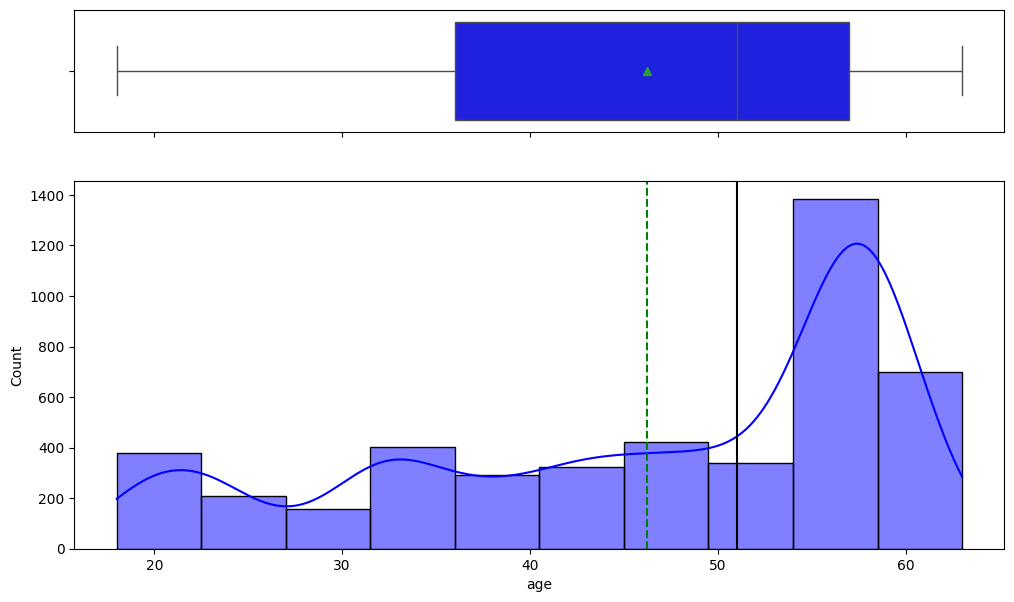

In [ ]:
# histogram and boxplot for 'age' numerical feature
histogram_boxplot(data, 'age', bins=10)

Observations:
*  The mean < median, indicating a negative skew to the distribution.

*   The central line inside the box marks the median at 51 years old. The box indicates the middle 50% are middle-aged between mid 30s and late 50s. The longer left whisker points to a negatively skewed distribution towards younger prospects.
*   The histogram shows a central peak around the mid to late 50s. This indicates older leads trying to upskill later in their careers. There is a long left tail, showing the skew to younger leads. There is a greater range of evenly spread younger ages, compared to sharp drop in older ages. Most older ages are retiring and not looking to upskill.
*   There are no individual points beyond the minimum and maximum ages, indicating there are no statisical outliers in the age distribution.





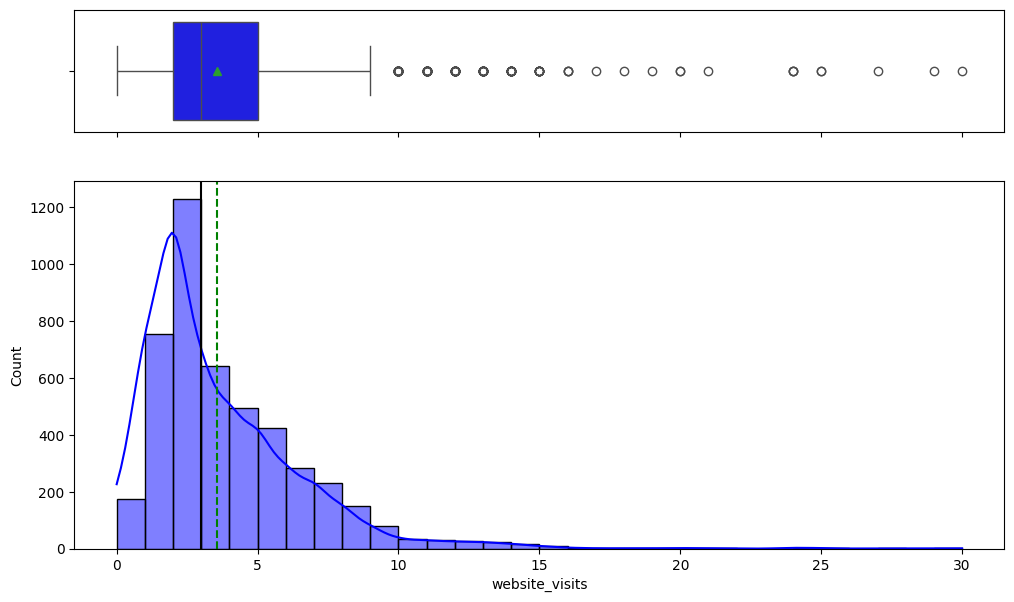

In [ ]:
# histogram and boxplot for 'website_visits' numerical feature
histogram_boxplot(data, 'website_visits', bins=30)

Observations:
*   The mean > median, indicating a strong positive skew to the distribution.
*   Theres a central peak around 1-3 visits, indicating most leads are casually browsing.
*   The histogram shows a highly right-skewed distribution, meaning most leads visit a few times with fewer making many visits. The long tail indicates some leads have very high visit counts, indicating high interest possibly before converting. Around 180 leads have not visited the website.
*   The boxplot shows the median is low around 3, confirming over half of the leads visit infrequently.
*   The IQR indicates most leads cluster between low and medium visit counts.

*   17 outliers beyond the upper whisker point to those leads with very high engagement, which would be strategic targets for conversion.




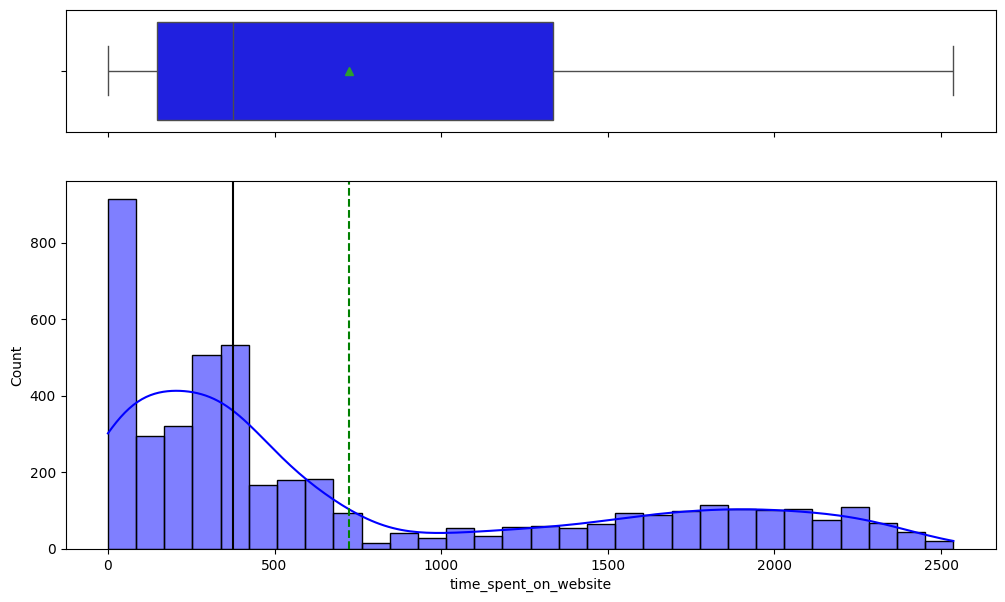

In [ ]:
# histogram and boxplot for 'time_spent_on_website' numerical feature
histogram_boxplot(data, 'time_spent_on_website', bins=30)

Observations:
*   The peak of distribution shows that a large number of leads spend a short amount of time on website(0-200 seconds), with many not visiting the website.
*   The mean > median, indicating a high positive skew to the distribution. The histogram shows a strongly right-skewed tail towards higher time spent on website, indicating a smaller group of highly engaged visitors.
*   The boxplot confirms the strong positive skew to the right.






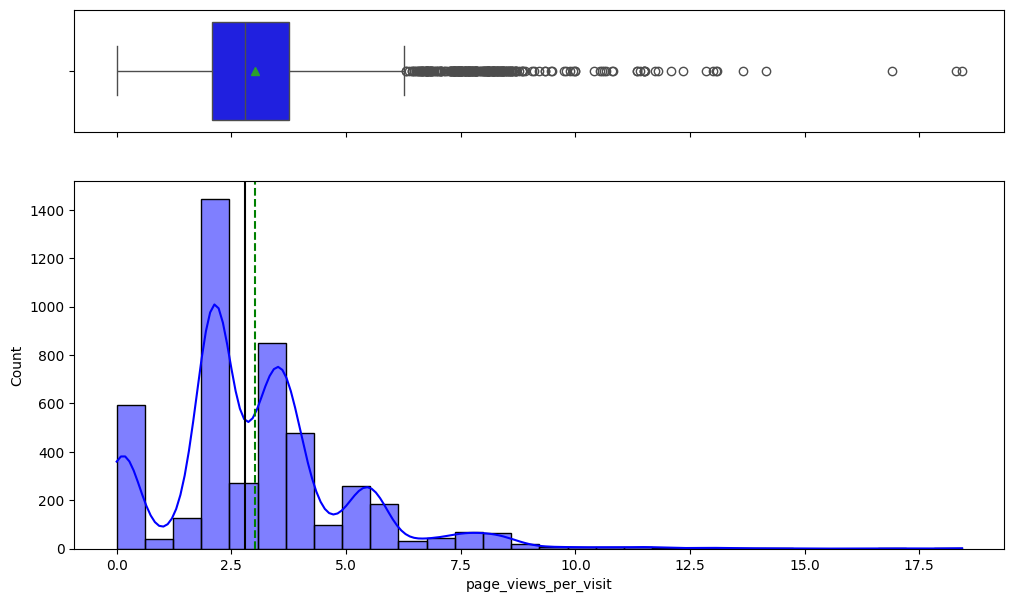

In [ ]:
# histogram and boxplot for 'page_views_per_visit' numerical feature
histogram_boxplot(data, 'page_views_per_visit', bins=30)

Observations:
*   The median and mean are similar in value.
*   The histogram is multimodal, showing 4 different peaks. The median and mean are centered between to two middle largest.
*   A sizeable number of leads have not visited the website. There is a strong right-skewed distribution, with the boxplot showing a sizeable number of outliers. This subset indicate highly engaged sessions.


In [ ]:
# create a function for a labeled barplot
def labeled_barplot(data, feature, perc = False, n = None):
  """
  Barplot with percentage at the top

  data: dataframe
  feature: dataframe column
  perc: whether to display percentages instead of count (default is False)
  n: displays the top n category levels (default is None, i.e., display all levels)
  """

  total = len(data[feature])  # Length of the column
  count = data[feature].nunique()
  if n is None:
    plt.figure(figsize = (count + 1, 5))
  else:
    plt.figure(figsize = (n + 1, 5))

  plt.xticks(rotation = 90, fontsize = 15)
  ax = sns.countplot(
    data = data,
    x = feature,
    palette = "Paired",
    order = data[feature].value_counts().index[:n].sort_values(),
  )

  for p in ax.patches:
    if perc == True:
      label = "{:.1f}%".format(
          100 * p.get_height() / total
      )                       # Percentage of each class of the category
    else:
      label = p.get_height()  # Count of each level of the category

    x = p.get_x() + p.get_width() / 2  # Width of the plot
    y = p.get_height()  #height of the plot
    ax.annotate(
        label,
        (x, y),
        ha = "center",
        va = "center",
        size = 12,
        xytext = (0, 5),
        textcoords = "offset points",
    ) # annotate the percentage

  plt.show()  # Show the plot

count             4612
unique               3
top       Professional
freq              2616
Name: current_occupation, dtype: object




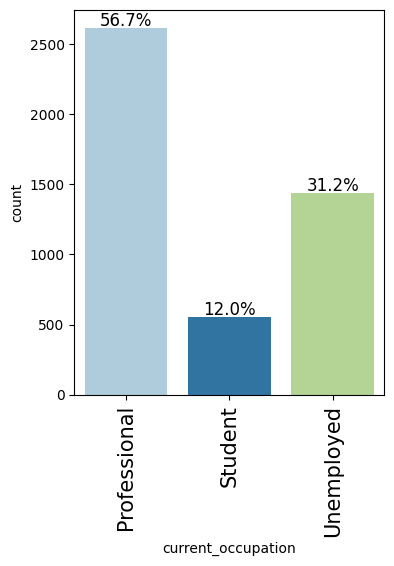

In [ ]:
# Use describe() to get unique values of non-numeric variables
print(data['current_occupation'].describe().T)
print('\n')
# labeled barplot for 'current_occupation' feature
labeled_barplot(data, 'current_occupation', perc=True)

Observations:


*   The 'current_occupation' feature has 3 unique subcategories(Professional, Student, Unenployed).


*   The majority of leads are working professionals(56.7%) with a count of 2616 out of the 4612 leads.. Next is unemployed(31.2%), followed last by student(12.0).



count        4612
unique          2
top       Website
freq         2542
Name: first_interaction, dtype: object




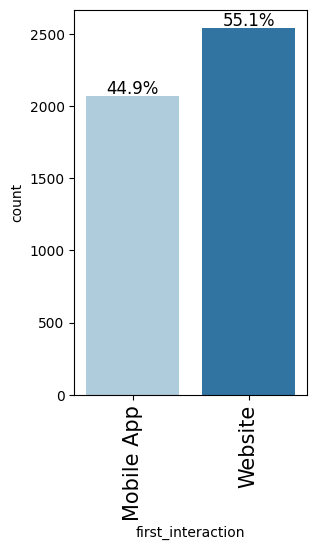

In [ ]:
# Use describe() to get unique values of non-numeric variables
print(data['first_interaction'].describe().T)
print('\n')
# labeled barplot for 'first_interaction' feature
labeled_barplot(data, 'first_interaction', perc=True)

Observations:


*   The 'first_interaction' feature has 2 unique subcategories(Mobile App, Website).


*   A slight majority of leads first interacted with the website(55.1%) with a count of 2542 out of 4612, versus the mobile app(44.9%).



count     4612
unique       3
top       High
freq      2264
Name: profile_completed, dtype: object




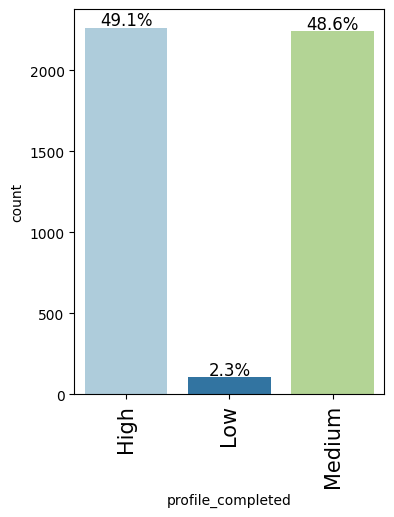

In [ ]:
# Use describe() to get unique values of non-numeric variables
print(data['profile_completed'].describe().T)
print('\n')
# labeled barplot for 'profile_completed' feature
labeled_barplot(data, 'profile_completed', perc=True)

Observations:



*   The 'profile_completed' feature has 3 unique subcategories(High, Medium, Low).


*   The two largest subsets are high(49.1%) with the top count of 2264 out of 4612, and medium(48.6%) profile completion. Very few leads have low(2.3%) profile completion. High refers to leads who haved 75-100% of their profile completed, medium is 50-75% of profile completed, and low is 0-50% of their profile completed.



count               4612
unique                 3
top       Email Activity
freq                2278
Name: last_activity, dtype: object




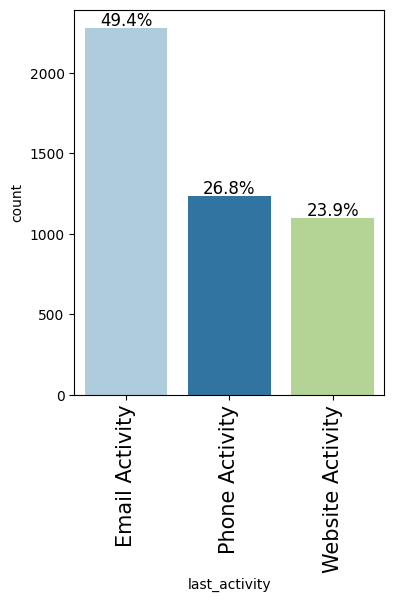

In [ ]:
# Use describe() to get unique values of non-numeric variables
print(data['last_activity'].describe().T)
print('\n')
# labeled barplot for 'last_activity' feature
labeled_barplot(data, 'last_activity', perc=True)

Observations:


*   The 'last_activity' feature has 3 unique subcategories(Email Activity, Phone Activity, Website Activity).


*   The majority of leads last activity was with email(49.4%) with a top count of 2278 out of 4612, followed by phone(26.8%), and then website(23.9%).



count     4612
unique       2
top         No
freq      4115
Name: print_media_type1, dtype: object




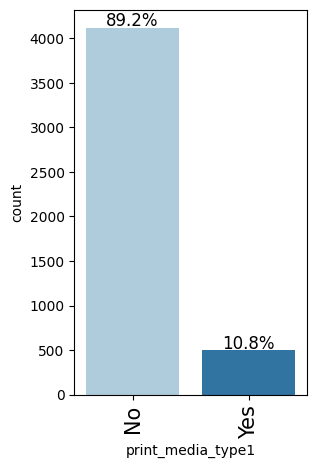

In [ ]:
# Use describe() to get unique values of non-numeric variables
print(data['print_media_type1'].describe().T)
print('\n')
# labeled barplot for 'print_media_type1' feature
labeled_barplot(data, 'print_media_type1', perc=True)

Observations:


*   The 'print_media_type1' feature has the large majority not seeing an ad in the newspaper(89.2%), at a count of 4115 out of 4612.


count     4612
unique       2
top         No
freq      4379
Name: print_media_type2, dtype: object




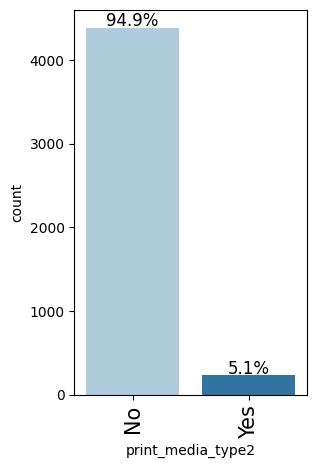

In [ ]:
# Use describe() to get unique values of non-numeric variables
print(data['print_media_type2'].describe().T)
print('\n')
# labeled barplot for 'print_media_type2' feature
labeled_barplot(data, 'print_media_type2', perc=True)

Observations:


*   The 'print_media_type2' feature has the large majority not seeing an ad in a magazine(94.9%), at a count of 4379 out of 4612.

count     4612
unique       2
top         No
freq      4085
Name: digital_media, dtype: object




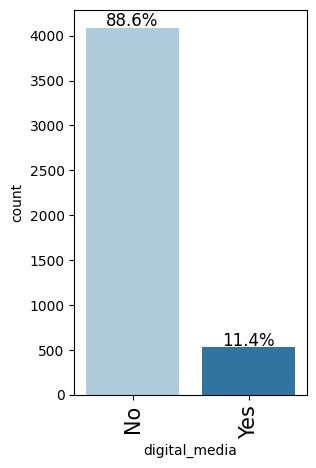

In [ ]:
# Use describe() to get unique values of non-numeric variables
print(data['digital_media'].describe().T)
print('\n')
# labeled barplot for 'digital_media' feature
labeled_barplot(data, 'digital_media', perc=True)

Observations:


*   The 'digital media' feature has the large majority not seeing an ad on a digital platform(88.6%), at a count of 4085 out of 4612.

count     4612
unique       2
top         No
freq      3907
Name: educational_channels, dtype: object




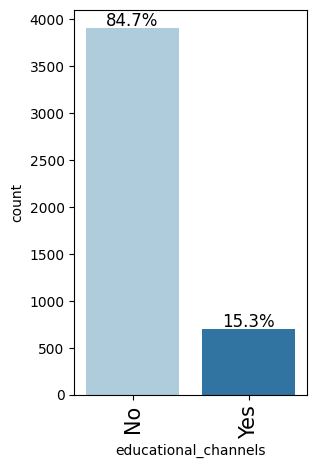

In [ ]:
# Use describe() to get unique values of non-numeric variables
print(data['educational_channels'].describe().T)
print('\n')
# labeled barplot for 'educational_channels' feature
labeled_barplot(data, 'educational_channels', perc=True)

Observations:


*   The 'educational_channels' feature has the large majority not seeing an ad on educational channels like online forums, discussion threads, educational websites, etc.(84.7%), at a count of 3907 out of 4612.

count     4612
unique       2
top         No
freq      4519
Name: referral, dtype: object




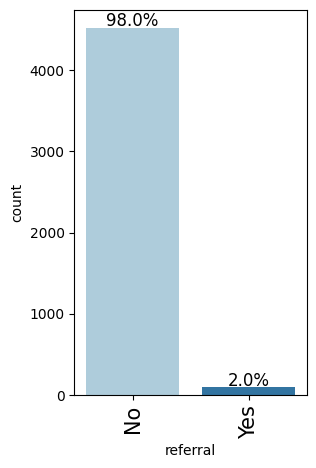

In [ ]:
# Use describe() to get unique values of non-numeric variables
print(data['referral'].describe().T)
print('\n')
# labeled barplot for 'referral' feature
labeled_barplot(data, 'referral', perc=True)

Observations:


*   The 'referral' feature has the large majority having not heard about it through a reference(98.0%), at a count of 4519 out of 4612.

count    4612.000000
mean        0.298569
std         0.457680
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: status, dtype: float64




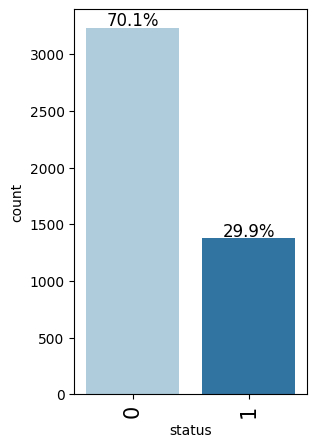

In [ ]:
# Use describe() to get unique values of non-numeric variables
print(data['status'].describe().T)
print('\n')
# labeled barplot for 'status' feature
labeled_barplot(data, 'status', perc=True)

Observations:


*   The majority of leads were not converted into the program(70.1%), with only about 29.9% converting to a yes into the program.




# **Bivariate Analysis**

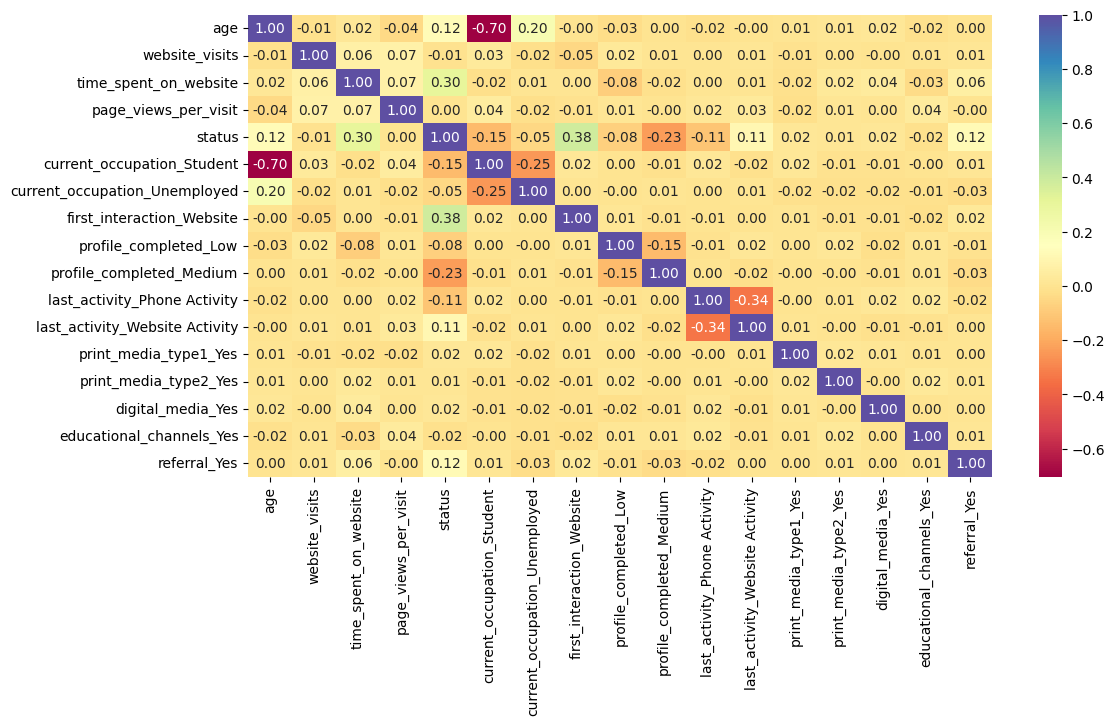

In [ ]:
# One-hot encode the categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Spectral")
plt.show()

Observations:
*   "time_spent_on_website' has a strong positive correlation with 'status'(0.30), meaning the more time a lead spends on the website, the more likely they are to convert.
*   'first_interaction_Website' has a strong positive correlation with 'status'(0.38), meaning the leads who first interact via the website are much more likely to convert.
*   It can be inferred from the negative correlation of 'profile_completed_Medium'(-0.23) and 'profile_completed_Low(-0.08) with 'status', that 'profile_completed_High' is postively correlated with conversion.
*   'current_occupation_Student' has a negative correlation with 'status', which suggests student are less likely to convert compared to the reference category 'current_occupation_Professional'.
*   'age' has a small positive correlation with 'status', which suggests that older leads are slightly more susceptible to converting.








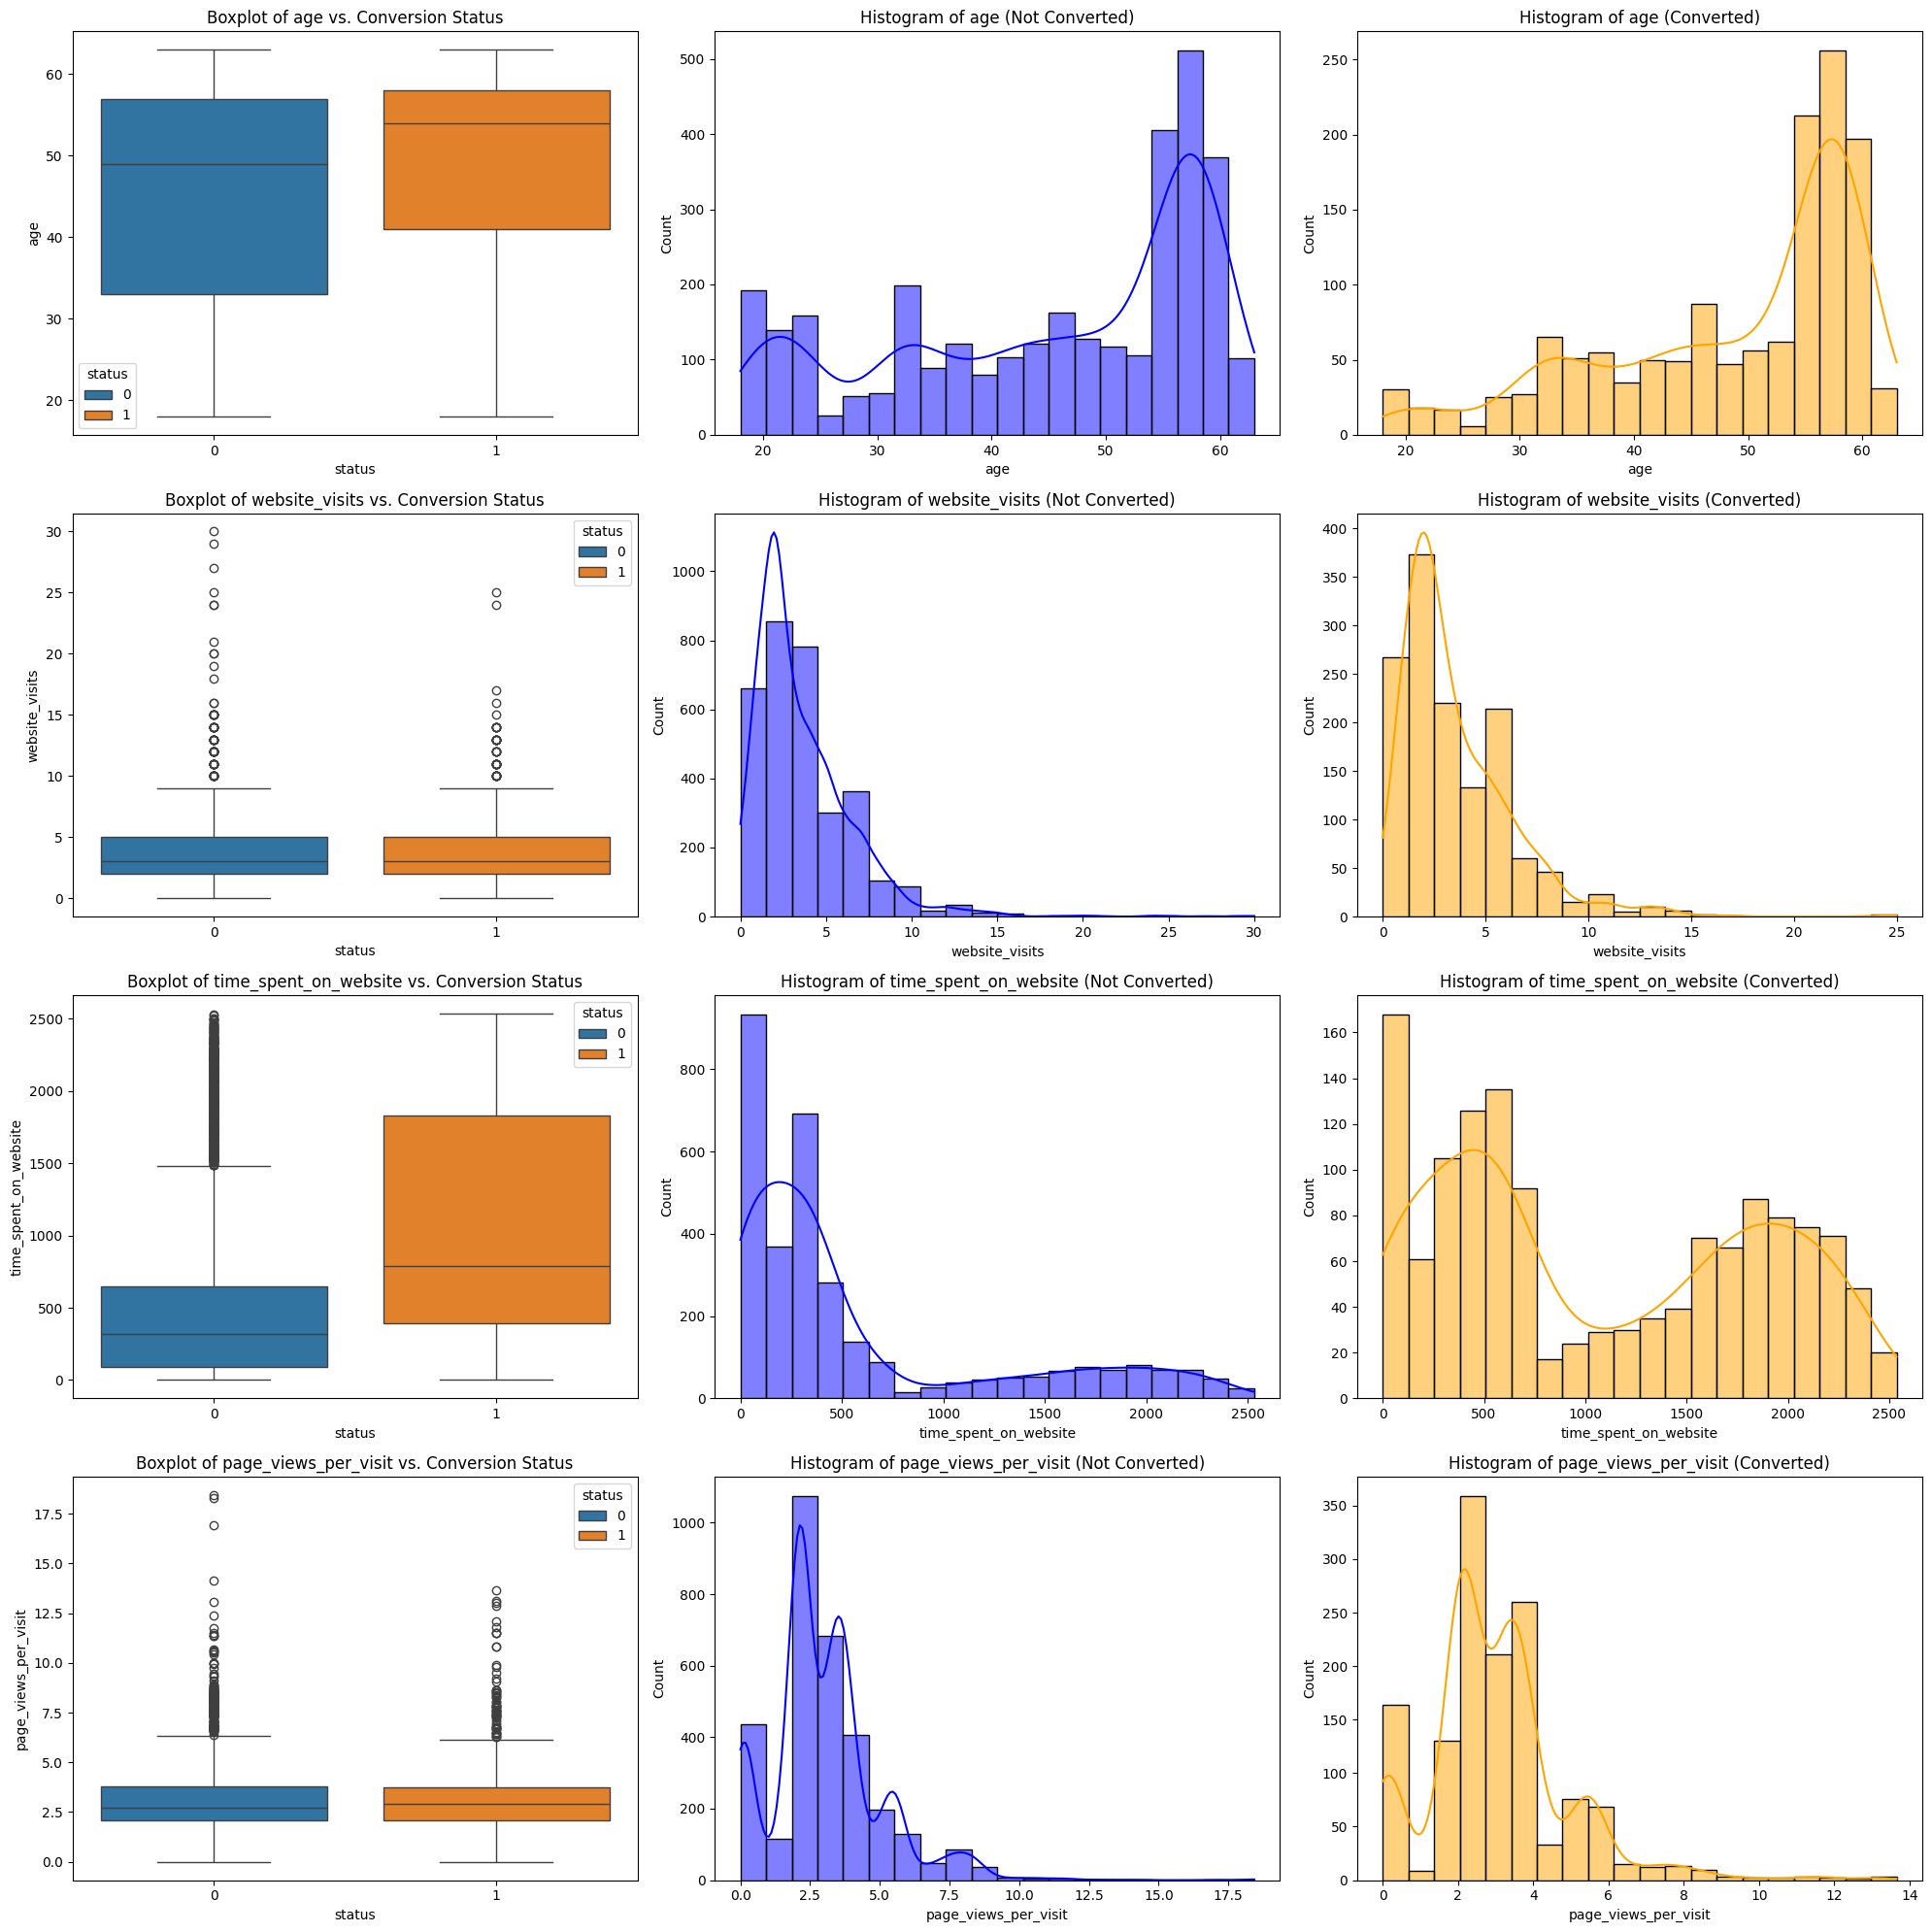

In [ ]:
# Bivariate analysis of all numerical features vs status with histograms and boxplots

numerical_features = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

fig, axes = plt.subplots(len(numerical_features), 3, figsize=(20, 20))

for i, feature in enumerate(numerical_features):
    # Boxplot
    sns.boxplot(data=data, x='status', y=feature, ax=axes[i, 0], hue='status')
    axes[i, 0].set_title(f'Boxplot of {feature} vs. Conversion Status')

    # Histogram for non-converted
    sns.histplot(data=data[data['status']==0], x=feature, ax=axes[i, 1], bins=20, kde=True, color='blue')
    axes[i, 1].set_title(f'Histogram of {feature} (Not Converted)')

    # Histogram for converted
    sns.histplot(data=data[data['status']==1], x=feature, ax=axes[i, 2], bins=20, kde=True, color='orange')
    axes[i, 2].set_title(f'Histogram of {feature} (Converted)')


plt.tight_layout()
plt.show()

In [ ]:
# median time_spent_on_website converted vs. non-converted
data.groupby(['status'])['time_spent_on_website'].median()

,time_spent_on_website
status,
0,317.0
1,789.0


Observations:
*   The boxplot for 'age' shows the median age of converted leads(status=1) is slightly higher than non-converted leads(status=0). Its histogram show converted leads distribution more concentrated in the 40-60 age range, whereas the non=converted leads are more spread out and higher in the younger age groups. This collaborates with the positive correlation found in the heatmap.
*   The boxplots and histograms of 'page_views_per_visit' and 'website visits' for both converted and non-converted leads are very similar. Both are strongly right-skewed. There are no obvious differences that make these strong predictors alone.
*   The boxplot for 'time_spent_on_website' converted leads is significantly higher than the one for non-converted leads. The median of converted leads time spent on website is 789.0 versus non-converted leads 317.0.r. The histogram for converted leads is more spread out at higher values with peaks of greater clustered at these higher values. The histogram for non-converted is clustered at the lower end, with a larger number of leads spending little time on website. This confirms the findings of the heatmap that suggests that leads with a greater interest will spend more time interacting with the information on the website.






In [ ]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
  """
  Print the category counts and plot a stacked bar chart

  data: dataframe
  predictor: independent variable
  target: target variable
  """
  count = data[predictor].nunique()
  sorter = data[target].value_counts().index[-1]
  tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
      by = sorter, ascending = False
  )
  print(tab1)
  print('-' * 120)
  tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
      by = sorter, ascending = False
  )
  tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
  plt.legend(loc = "lower left", frameon = False)
  plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
  plt.show()

**Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


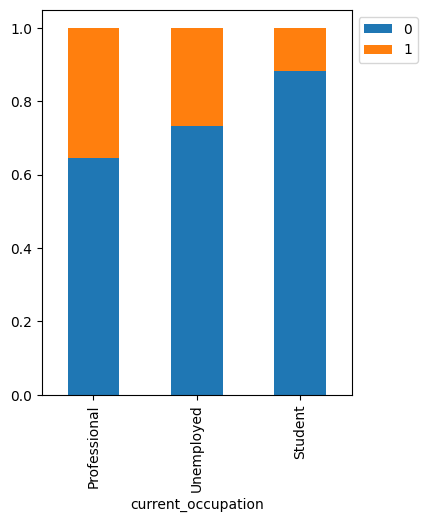

In [ ]:
# stacked barplot for 'current_occupation' and 'status'
stacked_barplot(data, 'current_occupation', 'status')

In [ ]:
print('Professional conversion rate: ', 929/2616)
print('Unemployed conversion rate: ', 383/1441)
print('Studebt conversion rate: ', 65/555)

Professional conversion rate:  0.3551223241590214
Unemployed conversion rate:  0.26578764746703676
Studebt conversion rate:  0.11711711711711711


Observations:
*   Professionals show higher conversion rates(35.5%), indicating strong interest and ability to pay. They may view the program as a way to reskill or get promoted, which drives this higher intent and conversion.
*   Unemployed show a moderate conversion rate(26.6%) The lower conversion rates may be due to a lack of purchasing power.
*   Students have the lowest conversion rate(11.7%). For students, the program is probably contending with more traditional avenues of education. Students are whats likely driving the correlation between 'current_occupation' and 'status'.





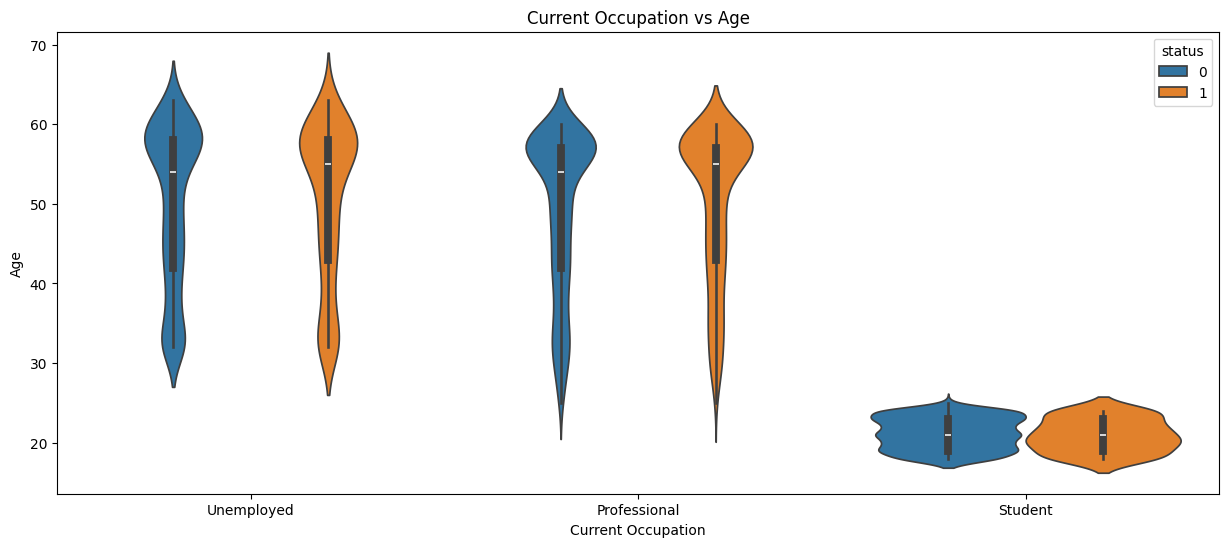

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


In [ ]:
# boxplot for 'current_occupation' and 'age'
plt.figure(figsize=(15, 6))
plt.title('Current Occupation vs Age')
plt.xlabel('Current Occupation')
plt.ylabel('Age')
sns.violinplot(x='current_occupation', y='age', hue='status', data=data)
plt.show()
data.groupby('current_occupation')['age'].describe()

Observations:


*   Professional and Unemployed leads have similar means and medians around 50 and 54, respectively. The violinplot shows that they have similar enough densities and IQR spread. Professional leads have a slightly younger min and employed leads have a slightly older max. Student leads are clearly much younger than the two other groups, with a mean of 21 and a median of 21.
*   There isn't a pronounced difference in the age distribution
between those who convert and those who don't within these groups. This suggests that 'age' and 'current_occupation' should be considered together in its interaction with conversion 'status'.








**The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


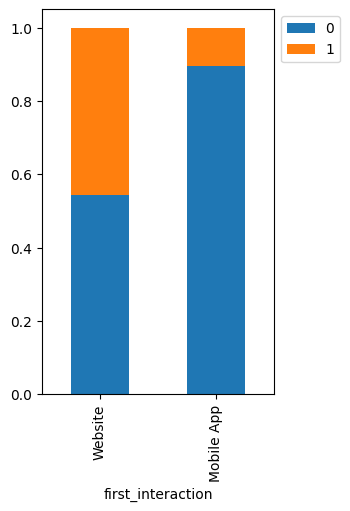

In [ ]:
# stacked barplot for 'first_interaction' and 'status'
stacked_barplot(data, 'first_interaction', 'status')

In [ ]:
print('Website conversion rate: ', 1159/2542)
print('Mobile App conversion rate: ', 218/2070)

Website conversion rate:  0.45594020456333595
Mobile App conversion rate:  0.10531400966183575


Observations:
*   This confirms the heatmap that the first source of interaction has an impact on the leads conversion status. Those leads whose first interaction was with the website have a significantly higher conversion rate(45.6%) than those whose first interaction was via the mobile app(10.5%).
*   The website is clearly the most effective channel for leads likely to convert. This could be due to the website providing a superior experience for leads in acquiring information about the program and garnering their interest.
*   The low conversion rate of the mobile app is a concern that should be explored to determine the reason for this. If it is poor user design, it would be necessary to redesign it or re-evaluate its overall roll in the marketing strategy. It could be used to guide leads to the website.





**The company uses multiple modes to interact with prospects. Which way of interaction works best?**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


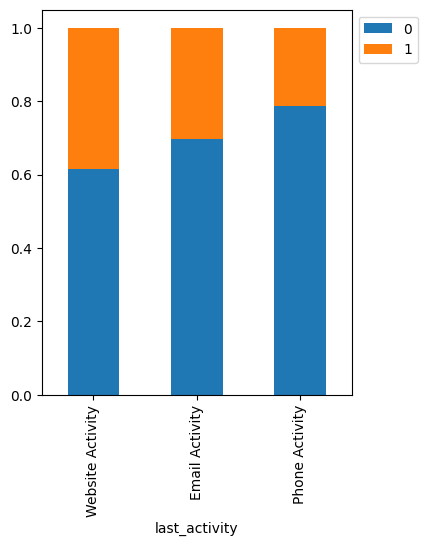

In [ ]:
# stacked barplot for 'last_activity' and 'status'
stacked_barplot(data, 'last_activity', 'status')

In [ ]:
print('Website Activity conversion rate: ', 423/1100)
print('Email Activity conversion rate: ', 691/2278)
print('Phone Activity conversion rate: ', 263/1234)

Website Activity conversion rate:  0.3845454545454545
Email Activity conversion rate:  0.3033362598770852
Phone Activity conversion rate:  0.21312803889789303


Observations:
*   Website activity has the highest lead conversion rate(38.5%). This suggests that interactions with live chat or updating profile are strong indicators of conversion.
*   Email activity has a lower lead conversion rate(30.3%), where details are sought about program through email, representative shares information with lead like the program brochure, etc. Emails are the most common last interaction with the highest overall number of leads, even if they aren't the most effective.
*   Phone activity has the lowest lead conversion rate(21.3%), which suggests that phone calls or SMS conversations are less likely to lead to conversion compared to the others.





**The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


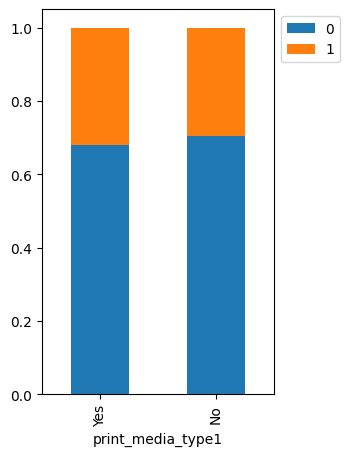

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


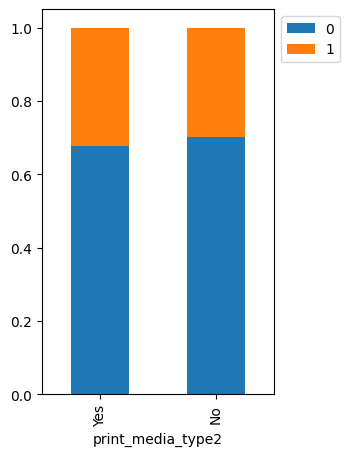

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


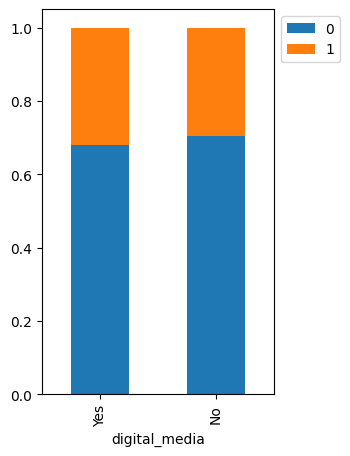

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


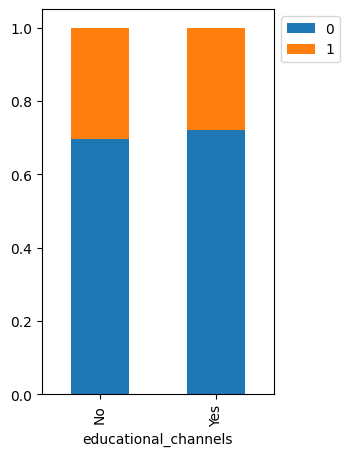

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


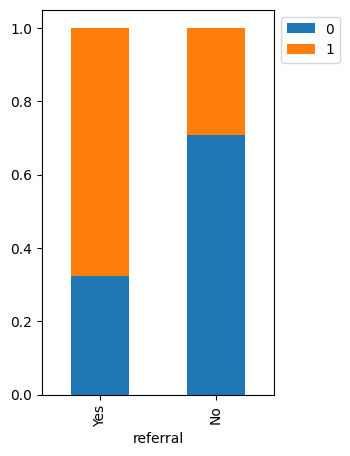

In [ ]:
# stacked boxplot for 'print_media_type1' and 'status'
stacked_barplot(data, 'print_media_type1', 'status')

# stacked barplot for 'print_media_type2' and 'status'
stacked_barplot(data, 'print_media_type2', 'status')

# stacked barplot for 'digital_media' and 'status'
stacked_barplot(data, 'digital_media', 'status')

# stacked barplot for 'educational_channels' and 'status'
stacked_barplot(data, 'educational_channels', 'status')

# stacked barplot for 'referral' and 'status'
stacked_barplot(data, 'referral', 'status')

In [ ]:
print('Newspaper conversion rate: ', 159/497)
print('Magazine conversion rate: ', 75/233)
print('Digital Media conversion rate: ', 168/527)
print('Educational channels conversion rate: ', 197/705)
print('Referral conversion rate: ', 63 /93)

Newspaper conversion rate:  0.3199195171026157
Magazine conversion rate:  0.3218884120171674
Digital Media conversion rate:  0.3187855787476281
Educational channels conversion rate:  0.2794326241134752
Referral conversion rate:  0.6774193548387096


Observations:
*   Referrals have the highest lead conversion rate(67.7%). This shows that a recommendation from a trusted source is a strongly impactful form of marketing. It is the most effective but there are few overall leads found through this way. The business should try to take advantage of this and grow its potential by encouraging referrals.
*   The other channels have fairly similar conversion rates and perform reasonably well, with newspapers('print_media_type1':32%), magazines('print_media_type2:33.6%), digital platforms('digital_media:31.9%), education channels('educational_channels:27.9%).
*   The large majority of leads answered no to these various channels, indicating there is room for growth for all of them.





**People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


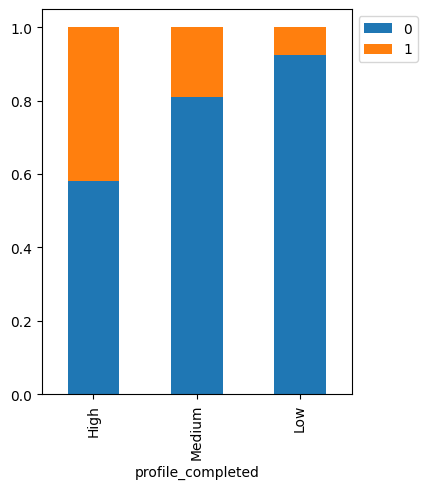

In [ ]:
# stacked barplot for 'profile_completed' and 'status'
stacked_barplot(data, 'profile_completed', 'status')

In [ ]:
print('High conversion rate: ', 946/2264)
print('Medium conversion rate: ', 423/2241)
print('Low conversion rate: ', 8/107)

High conversion rate:  0.4178445229681979
Medium conversion rate:  0.18875502008032127
Low conversion rate:  0.07476635514018691


Observations:
*   Having more details about a prospect does increase the chances of conversion. This corresponds with the findings of the heatmap. Those leads that had a high profile completion(75-100%), had the highest conversion rate(41.8%). The conversion rate for medium profile completion(50-75%) was much less (18.9%), and low profile conpletion(0-50%) was the lowest(7.5%).
*   This suggests that leads who fill out the profile completely are showing a high level of interest, which signals that the more information provided the more likely they are to convert. Leads with high levels of profile completion should be prioritized.






# **Summary of EDA**

**Data Description:**

*   The dataset has 4612 leads with 15 different feature attributes.
*   All the columns have 4612 non-null values, meaning there is no missing values in the data.




**Observations from EDA:**


*   'ID' column is dropped because it is an identifier and won't add value to analysis.
*   The majority of leads are working professionals(57%). This is followed by unemployed(31%) and students(12%).
*   The average age of a lead is around 46, with most leads being middle-aged.
*   First interactions are primarily through the website(55%), which is slightly more than the mobile app(45%).
*   The vast majority of leads have either high(49%) or medium(~49%) profile completion, indicating a good level of initial interest.
*   TThe most common mode of last activity is with email(49%), followed by phone activity(27%) and website activity(24%).
*   Most leads spend a relatively short amount of time on the website, but there is a number of highly engaged users who spend a significant amount of time, view more pages, and visit more frequently.
*   A large majority of leads did not hear about ExtraaLearn through print media, digital media, educational channels, or referrals.
*   The overall conversion rate is around 30%(status=1).
*   There is a moderate positive correlation between time spent on the website and lead conversion(0.30). This could indicate that those with greater interest will spend more time on the website and are who more likely to convert. Age shows a small correlation with lead conversion(0.12).
*   Leads who convert(789.0) spend more than double the time on the website than leads that don't(317.0)
*   Age shows a small correlation with lead conversion(0.12). The age of those who convert have a greater median age than the age of those who don't.
*   Professionals have the highest conversion rates(35.5%), indicating strong interest and ability to pay. They may view the program as a way to reskill or get promoted, which drives this higher intent and conversion. It is followed by unemployed(26.6%) and students(11.7%). The lower conversion rates may be due to a lower purchasing power or contending with more traditional avenues of education.
*   First interaction channel is a major determining factor for conversion. The leads whose first interaction is with the website have a much higher conversion rate(45.6%) than those leads whose first interaction was via the mobile app(10.5%).
*   Last activity via the website has the greatest lead conversion rate(38.5%), followed by email(30.3%) and phone(21.3%).
*   Referrals are the most effective channel, having the highest lead conversion rate among the various media channels(67.7%), although it represent a very small portion of the total leads. Print media, digital media, and educational channels have conversion rates around 30%.
*   Profile completion is a strong indicator of intent. Having more details about a prospect does increase the chances of conversion. The leads with a high profile completion had the highest conversion rate(41.8%). This is significant in comparsion to leads with medium profile completion(18.9%), and low profile conpletion(7.5%).

# **Prepare data for modeling**

In [ ]:
# Creating dummy variables for categorical columns
data = pd.get_dummies(data, columns = data.select_dtypes(include = ['object', 'category']).columns.tolist(), drop_first=True, dtype=int)
data.sample(10)

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
3073,63,2,14,3.077,1,0,1,1,0,0,0,0,0,0,0,1,0
1497,52,2,1405,3.708,0,0,1,0,0,0,0,0,1,0,0,0,0
3608,56,1,68,5.517,0,0,1,0,0,0,0,0,0,0,0,0,0
2032,59,1,80,7.269,0,0,0,0,0,1,0,0,0,0,0,0,0
3230,34,3,279,3.445,0,0,1,1,0,0,1,0,0,0,0,0,0
616,58,2,1432,3.260,0,0,0,0,0,0,0,0,0,0,0,1,0
133,32,3,642,2.239,1,0,1,0,0,1,0,1,0,0,0,0,0
479,60,15,2042,3.003,0,0,0,0,0,1,0,0,0,0,1,0,0
4510,44,11,2337,2.175,0,0,0,0,0,1,0,0,0,0,0,0,0
3007,56,5,410,2.110,1,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Separating independent variables and target
X = data.drop(['status'], axis = 1)
y = data['status']

In [ ]:
# Split into train and test datasets at a ratio of 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y) # use stratify to ensure relative class frequencies preserved in each train and validation fold

In [ ]:
# Checking shape of train and test datasets
print(X_train.shape)
print(X_test.shape)
# Checking percent proportions of target train and test datasets
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(3228, 16)
(1384, 16)
status
0    0.701363
1    0.298637
Name: proportion, dtype: float64
status
0    0.70159
1    0.29841
Name: proportion, dtype: float64


**Model Evaluation Criterion:**


*   The model can make wrong predictions. For the business, avoiding the loss of a potential converted lead is the most important factor to consider. This means preventing misclassifications that wrongly predict a lead will not convert when they would have. In other words, the amount of false negatives should be optimally reduced, making recall the evaluating metric criterion of importance to be maximized. By focusing on optimizing the identification of true positives(status = 1), ExtraaLearn can have a more effective business strategy thats based on being able to better determine and prioritize its attention on leads who are likely to convert, which can help improve the success of the business and its potential growth.




# **Model Building**

In [ ]:
# Function to print classification report and get confusion matrix
def metrics_score(actual, predicted):
  print(classification_report(actual, predicted))

  cm = confusion_matrix(actual, predicted)
  plt.figure(figsize = (8, 5))
  sns.heatmap(cm  , annot = True, fmt = ".0f", xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'], cmap = "Blues")
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()

## Building a Decision Tree model

In [ ]:
# Decision Tree Classifier
dt =  DecisionTreeClassifier(class_weight={0: 0.30, 1: 0.70}, random_state=1) # use class weight hyperparameter to give more weightage to class 1

#Fit to model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

## Model Performance evaluation and improvement

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



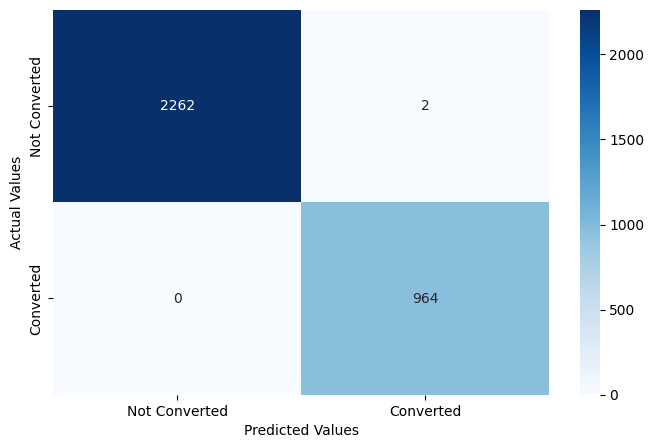

In [ ]:
# Checking performance on the train data
y_pred_train = dt.predict(X_train)

metrics_score(y_train, y_pred_train)

Observations:
*  The model has performed perfectly on the train data. This is a sign of overfitting where the model has learned more than the general patterns of the data.




              precision    recall  f1-score   support

           0       0.84      0.86      0.85       971
           1       0.66      0.62      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.74      0.75      1384
weighted avg       0.79      0.79      0.79      1384



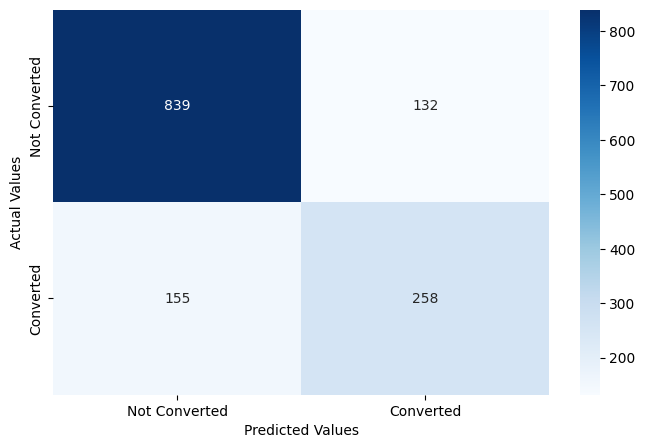

In [ ]:
# Checking performance on the test data
y_pred_test = dt.predict(X_test)

metrics_score(y_test, y_pred_test)

Observations:
*   The decision tree model performed worse on the test data. It has a macro recall score of 0.74. The recall score for converted leads dropped down to 0.62, failing to identify 38% of leads that would have converted. This would be a loss of potential revenue. The precision drops to 0.66 and the overall accuracy drops to 0.79.
*   The great difference of the models performance between the train and test data shows that it is overfitting on the train data, which means it generalizes poorly on the test data.
*   Can use hyperparameter tuning to combat the overfitting and allow the model to generalize better over unseen data.



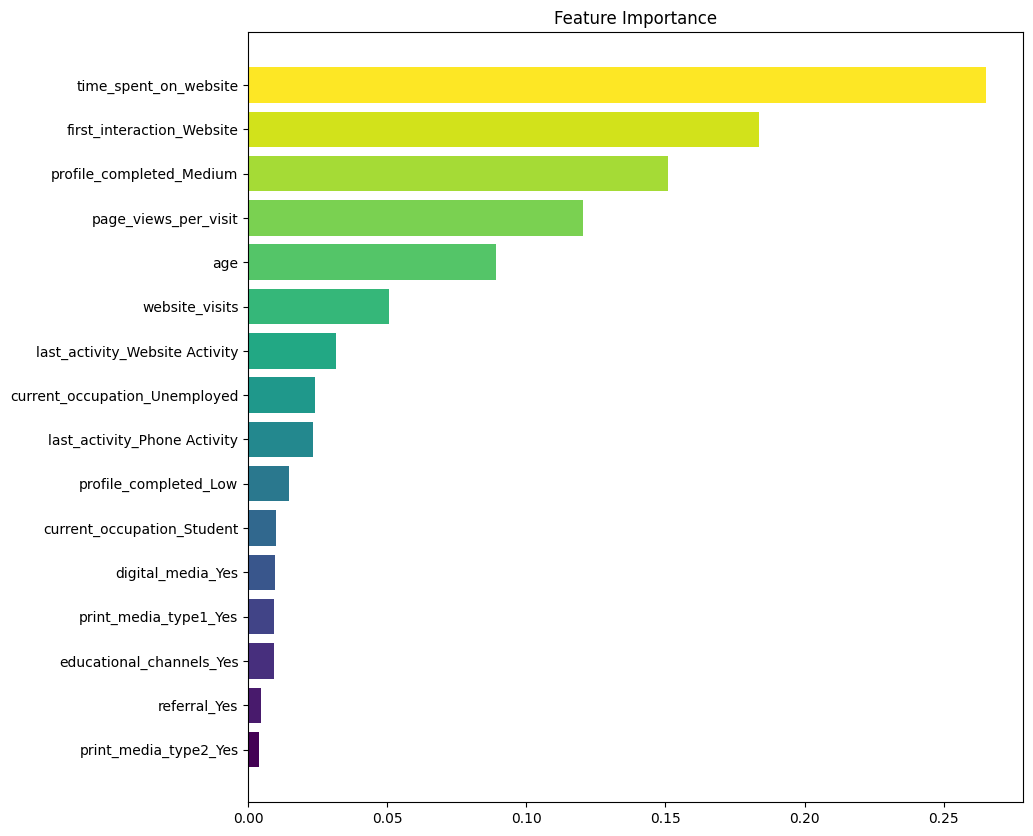

In [ ]:
# Checking feature importance

importances = dt.feature_importances_
columns = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)

# Rearrange feature names so they match the sorted feature importances
columns = columns[indices]

# Create plot
plt.figure(figsize = (10, 10))

# Create plot title
plt.title("Feature Importance")

# Add bars with different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(importances)))
plt.barh(range(X.shape[1]), importances[indices], color=colors)

# Add feature names as y-axis labels
plt.yticks(range(X.shape[1]), columns)

# Show plot
plt.show()

Observations:
*   The most important feature and strongest predictor of whether a lead will convert iis 'time_spent_on_website'. It can be deduced that the more time a lead spends on the website, the greater their interest for the program likely is. This suggests that marketing should place more focus on creating engaging content to keep leads on the website longer.
*   The second most important feature is 'first_interaction_Website', which tells us the initial point of contact is very important. Leads who interact with the company through the website are more likely to convert than through the mobile app. This could be due to the website providing a more comprehensive and persuasive experience. ExtraaLearn may want to explore why the mobile app is less effective and see if it can improve conversion rates.
*   The 'profile_completed_Medium' feature is also significant. This compared to the low importance of 'profile_completed_Low', reinforces the findings from the EDA that the level of completion is a good indicator of interest. While 'profile_completed_High' is not explicitly listed due to drop_first=True parameter, the importance of other 'profile_completed' features show its value.
*   The 'age' and 'page_views_per_vist' features are less than the top three, but notable in having some predictive power. This suggests that certain age groups are more likely to convert, and leads who view more pages are also more likely to convert.


*  The various media channel features have very low importance in the model. This can be possibly due to their impact being captured by other features.






**Hyperparameter Tuning**

In [ ]:
# Create Decision Tree Classifier to be used for tuning
dt_tuned = DecisionTreeClassifier(class_weight={0: 0.30, 1: 0.70}, random_state=1)

# Create parameter grid dictionary for different hyperparameter values to try
dt_parameters = {
    'max_depth': [5, 10, 15, 20], # controls max number of levels of decision tree
    'min_samples_leaf': [5, 10, 15, 20], # minimum number of samples to make a leaf node
    'min_samples_split': [10, 20, 30, 40], # minimum number of samples before node can split
    'criterion': ['gini', 'entropy'] # measuring the quality of a split
}

# Score(recall_score) used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_search = GridSearchCV(dt_tuned, dt_parameters, scoring = scorer, cv = 5)

grid_search = grid_search.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dt_tuned = grid_search.best_estimator_

# Fit the best algorithm to the data
dt_tuned.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=1)

Observations:
*   The estimated best hyperparameter combination for improved performance and to prevent overfitting are criterion='entropy', max_depth=5, min_samples_leaf=10.

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      2264
           1       0.68      0.89      0.77       964

    accuracy                           0.84      3228
   macro avg       0.81      0.86      0.83      3228
weighted avg       0.87      0.84      0.85      3228



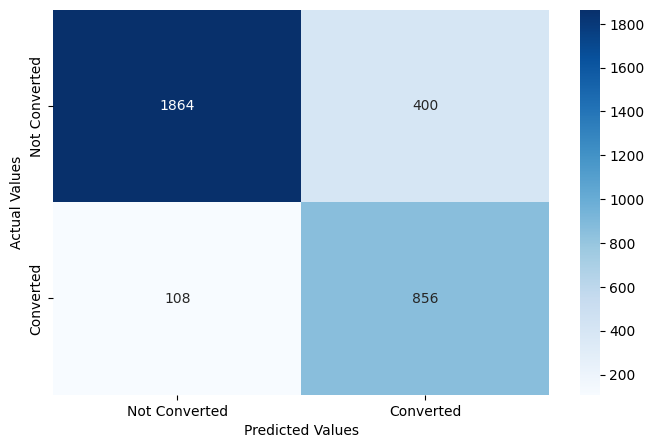

In [ ]:
# Checking tuned model performance on the train data
y_pred_train = dt_tuned.predict(X_train)

metrics_score(y_train, y_pred_train)

Observations:
*   The recall for converted leads is 0.89, which is a very good recall score. The tuned model was about to correctly identify 89% of all leads who actually converted. The precision for converted leads is  0.68, which means it will correctly predict a lead will convert 68% of the time. This is a trade-off to better optimize recall. The overall accuracy was 0.84, meaning it correctly predicts 84% of the time.
*   The original model had a perfect recall and precision score on the training data, which indicated it was overfitting. The tuned model has lower scores but this is good because it means its not overfitting and will generalize better on unseen data.



              precision    recall  f1-score   support

           0       0.93      0.81      0.87       971
           1       0.66      0.85      0.75       413

    accuracy                           0.83      1384
   macro avg       0.80      0.83      0.81      1384
weighted avg       0.85      0.83      0.83      1384



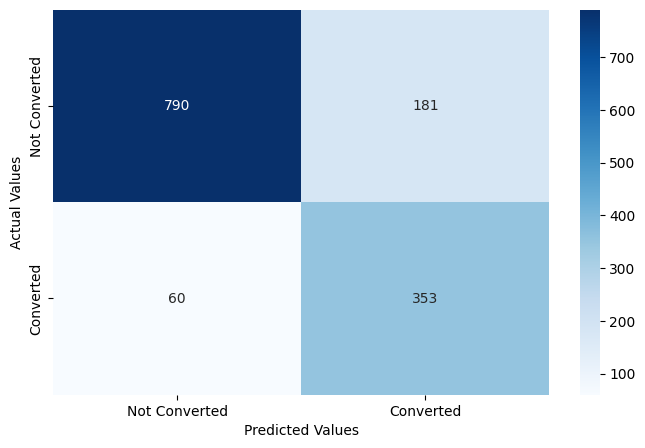

In [ ]:
# Checking tuned model performance on the test data
y_pred_test = dt_tuned.predict(X_test)

metrics_score(y_test, y_pred_test)

Observations:
*   The tuned decision tree achieved a high recall score, which is the primary metric of interest for this business problem. The recall score for converted leads is 0.85, which means the model correctly identified 85% of actual converted leads in the test data. This is a significant improvement on the original models recall score of 0.62.
*   It is effective at identifying converted leads, which aligns with the goal of not losing potential leads.
*   The precision score of converted leads is the exact same as the original models precision score at 0.66. This is fine since recall is what is being optimized.
*   The overall accuracy is 0.83, which is a slight improvement of the original models score of 0.79.
*   The tuned model addressed the overfitting problem. The closer in similarity of performance on the train and test data shows that the model generalizes better and can provide more reliable insights for ExtraaLearn in identifying potential leads for conversion, allowing the proper allocation of resources.



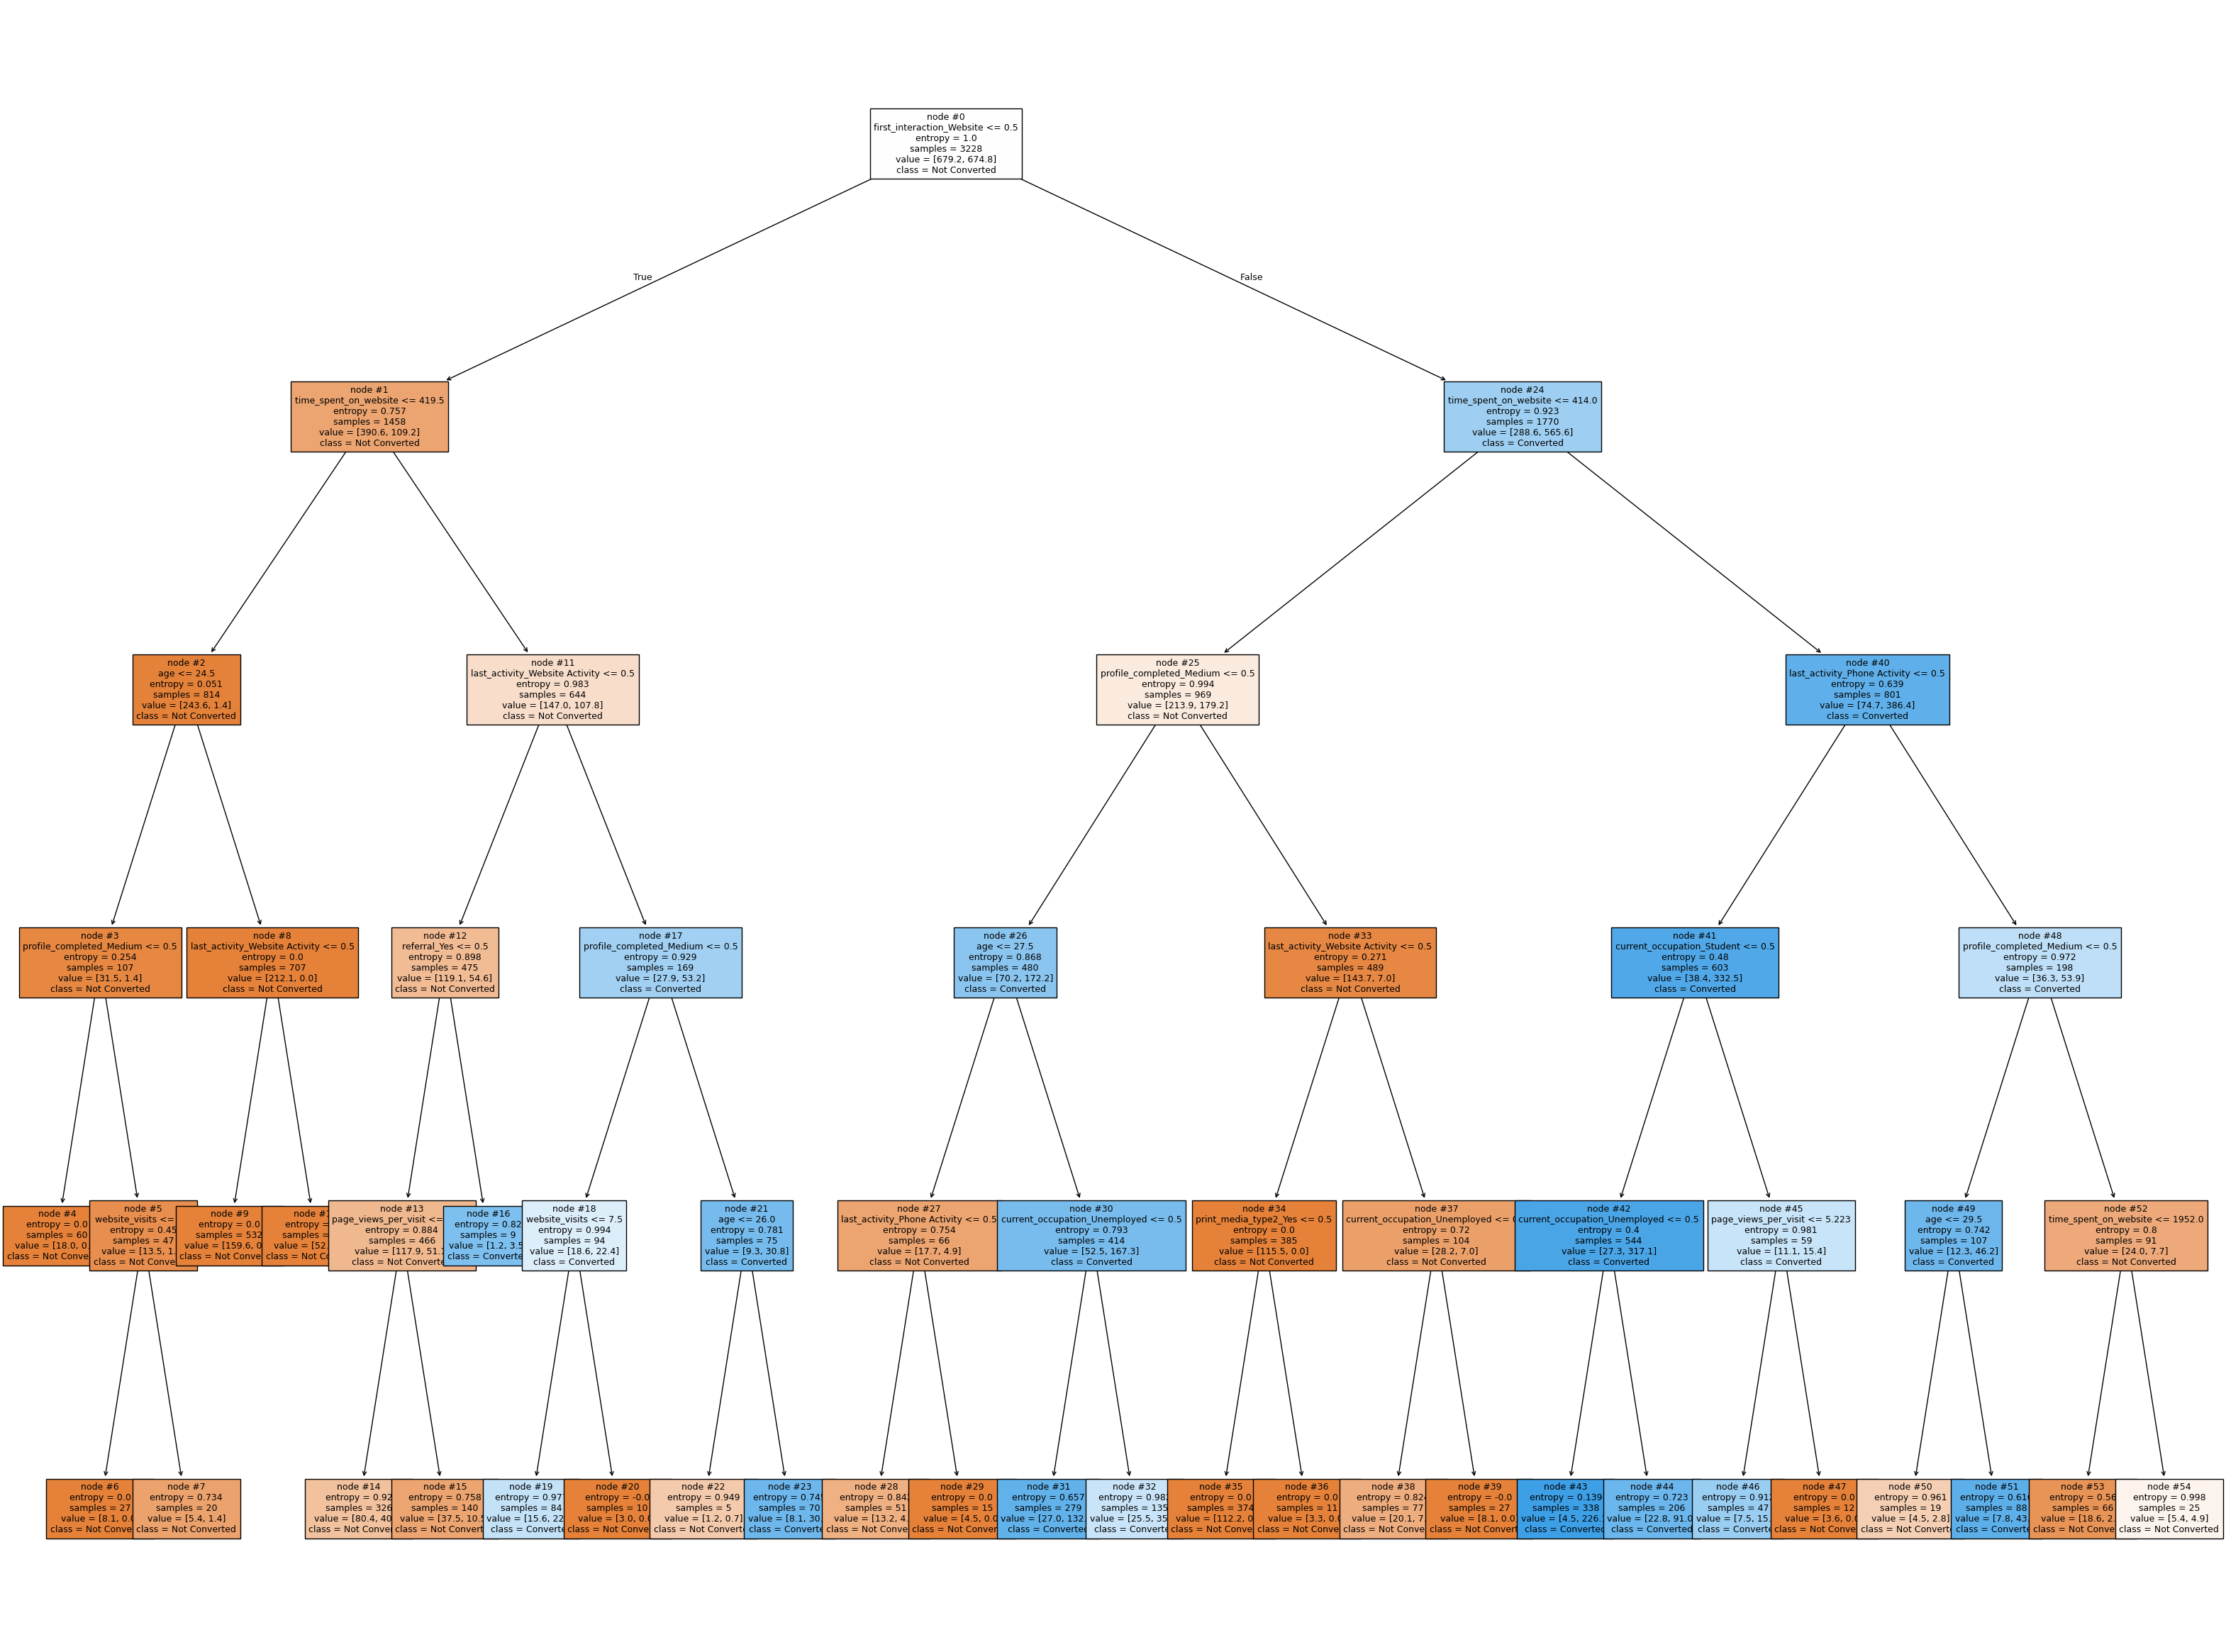

In [ ]:
# Visualize tuned Decision Tree
features = list(X.columns) #store independent variable features in list
plt.figure(figsize = (40, 30))
tree.plot_tree(dt_tuned, feature_names = features, class_names = ['Not Converted', 'Converted'], filled = True, fontsize = 9, node_ids=True )
plt.show()

Observations:
*   The decision tree plot reveals that the initial interaction channel is the critical factor in predicting lead conversion. Leads who first engage with the website are significantly more likely to convert than those who use the mobile app.
*   The Root Node is first_interaction_Website <= 0.5. This is the starting point of the decision tree, which means 'first_interaction' results in the highest information gain among all the features. If the value is less than or equal or 0.5, it means the first interaction was not through the website, and the model follows the left branch. If it is greater than 0.5, the first interaction was through the website and the model follows the right branch.
*   The plot further reveals that for both website and mobile app users, the next most important factor is time spent on the website. Those who spent more time on the website were more likely to convert.
*   Other important factors were high profile completion, being a professional, and their last activity being either website or email.
*   The ideal lead would be a professional who first interacts with the website, spends a significant amount of time browsing, and has a high level of profile completion.








In [ ]:
# text representation of decision tree
print(tree.export_text(dt_tuned, feature_names=X_train.columns.tolist(), show_weights=True))

|--- first_interaction_Website <= 0.50
|   |--- time_spent_on_website <= 419.50
|   |   |--- age <= 24.50
|   |   |   |--- profile_completed_Medium <= 0.50
|   |   |   |   |--- weights: [18.00, 0.00] class: 0
|   |   |   |--- profile_completed_Medium >  0.50
|   |   |   |   |--- website_visits <= 2.50
|   |   |   |   |   |--- weights: [8.10, 0.00] class: 0
|   |   |   |   |--- website_visits >  2.50
|   |   |   |   |   |--- weights: [5.40, 1.40] class: 0
|   |   |--- age >  24.50
|   |   |   |--- last_activity_Website Activity <= 0.50
|   |   |   |   |--- weights: [159.60, 0.00] class: 0
|   |   |   |--- last_activity_Website Activity >  0.50
|   |   |   |   |--- weights: [52.50, 0.00] class: 0
|   |--- time_spent_on_website >  419.50
|   |   |--- last_activity_Website Activity <= 0.50
|   |   |   |--- referral_Yes <= 0.50
|   |   |   |   |--- page_views_per_visit <= 3.68
|   |   |   |   |   |--- weights: [80.40, 40.60] class: 0
|   |   |   |   |--- page_views_per_visit >  3.68
|   |  

Observations:
*   A path that leads to a leaf node that is strongly classified as 'Converted' is: first_interaction_Website > 0.5 /  time_spent_on_website > 414.0  / last_activity_Phone_Activity <= 0.5 / current_occupation_Student <= 0.5 / current_occupation_Unemployed <= 0.5. This is a lead who is a professional who initially interacted through the website, spent significant time on it, and their last activity wasn't a phone call.
*   A path that leads to a leaf node that is strongly classified as "Not Converted" is: first_interaction_Website <= 0.5  /time_spent_on_website <= 419.5 / age > 24.5 / last_activity_Website Activity <= 0.5. This is a lead who first interacts with the mobile app, spends little time on the website, is older than 24.5, and whose last activity was not on the website.

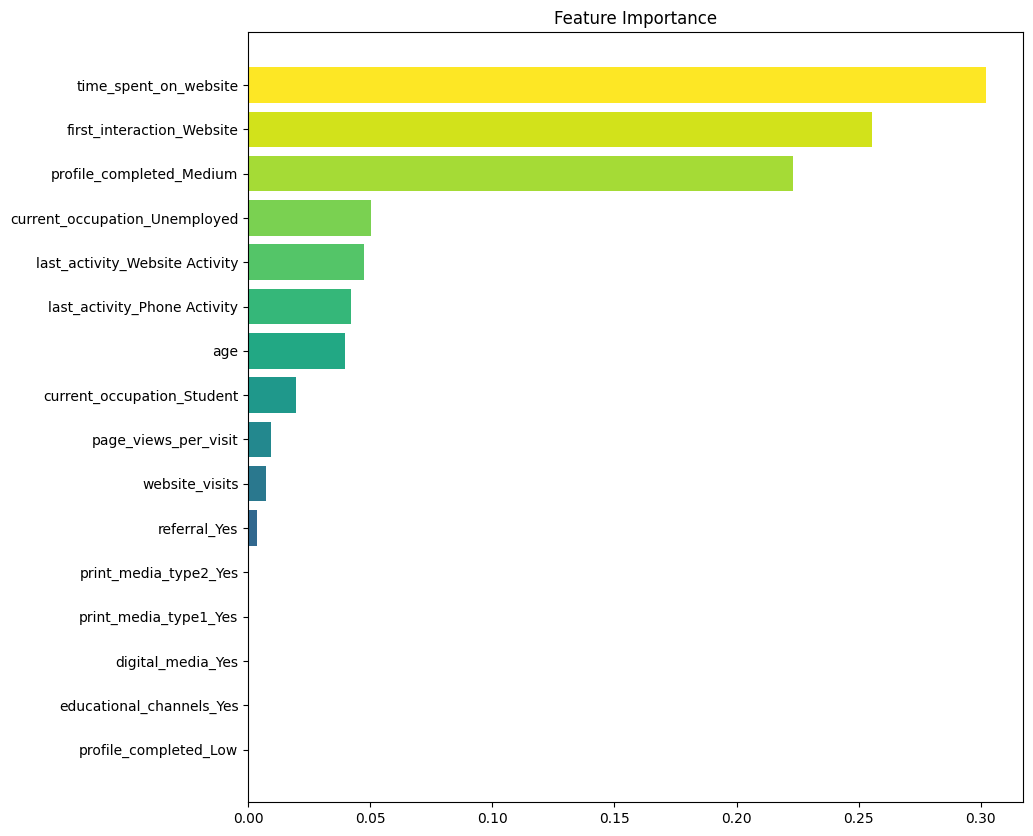

In [ ]:
# Checking tuned model feature importance

importances = dt_tuned.feature_importances_
columns = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)

# Rearrange feature names so they match the sorted feature importances
columns = columns[indices]

# Create plot
plt.figure(figsize = (10, 10))

# Create plot title
plt.title("Feature Importance")

# Add bars with different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(importances)))
plt.barh(range(X.shape[1]), importances[indices], color=colors)

# Add feature names as y-axis labels
plt.yticks(range(X.shape[1]), columns)

# Show plot
plt.show()

Observations:
*   The feature importance of the tuned model is very similar to the original model. This shows consistency in identifying the same key features and provides confidence in the findings. The tuned model is less likely to overfit, so there can be more confidence in these feature importances generalizing over new, unseen data.
*   The feature importance chart aligns with the structure of the decision tree plot. Features that appear higher up the tree are the ones with higher importance scores.
*   The 'time_spent_on_website' feature remains the most dominant factor in predicting if a lead will convert. It appears on the second level of splits for both left and right branches, which emphasizes its importance. The model consistently used this feature to determine whether a lead were likely to convert or not. It strongly suggests that the longer time spent on the website, the more likely a lead were to convert. This highlights the necessity for engaging website content as a critical part of the conversion process.
*   The 'first_interaction_Website' was again the second most important feature. It points to the initial point of contact being a strong predictor, with those leads who first interact via the website being significantly more likely to convert.
*   The 'profile_completed_Medium' feature remains a significant factor, reinforcing that the profile completion level is a strong indicator of a leads interest and conversion.
*   The features 'current_occupation_Unemployed' and 'current_occupation_Student' indicates that the model uses the leads occupation to refine its predictions. 'Unemployed' being higher than "Student' suggests the model finds the distinction between professionals and unemployed more significant that between professionals and students.
*   The 'last_activity_Website' and 'last_activity_Phone_Activity' features show that the model has learned that these features are more predictive than email activity.
*   The 'age' feature is moderately important, indicating that certain age groups are more likely to convert.
*   The other features remain of low importance.









## Building a Random Forest model

In [ ]:
# Random Forest Classifier
rf =  RandomForestClassifier(class_weight={0: 0.30, 1: 0.70}, random_state=1) # use class weight hyperparameter to give more weightage to class 1

# Fit to model
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

## Model Performance evaluation and improvement

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



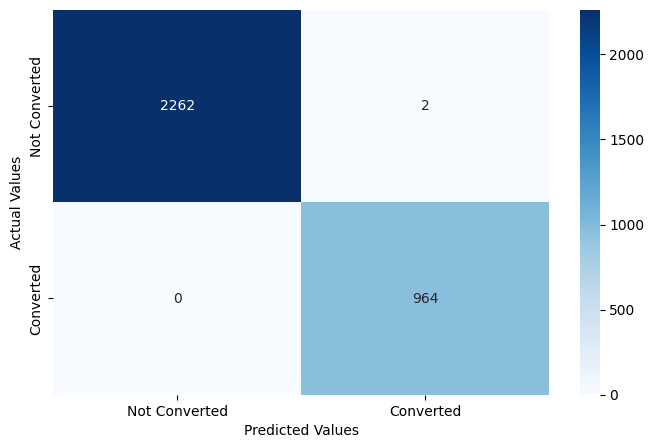

In [ ]:
# Checking performance on the train data
y_pred_train = rf.predict(X_train)

metrics_score(y_train, y_pred_train)

Observations:
*   The random forest model has performed perfectly on the training data.
*   The perfect score could indicate that the model is overfitting by learning the training data too well.


              precision    recall  f1-score   support

           0       0.89      0.93      0.91       971
           1       0.81      0.72      0.76       413

    accuracy                           0.87      1384
   macro avg       0.85      0.82      0.83      1384
weighted avg       0.86      0.87      0.86      1384



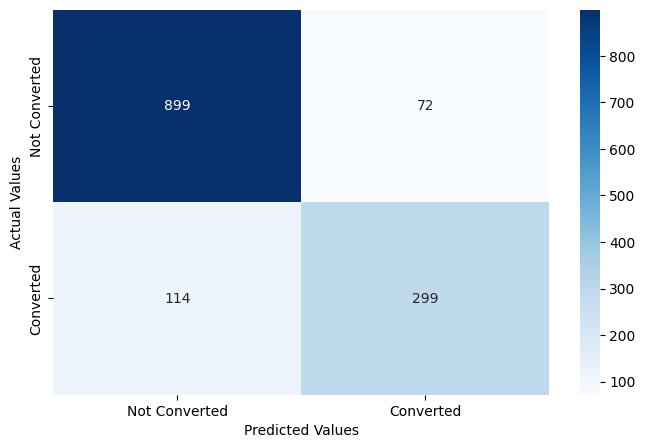

In [ ]:
# Checking performance on the test data
y_pred_test = rf.predict(X_test)

metrics_score(y_test, y_pred_test)

Observations:
*   The random forest model performed worse on the test data, indicating overfitting. It has a macro recall score of 0.82. The recall score for converted leads is 0.72. While this is a decent recall score, it is lower than the tuned decision trees recall of 0.85.
*   The precision of converted leads drops to 0.81, which is lower than the test data but still a strong score. The overall accuracy was 0.87.
*   The random forest model has better precision and accuracy than the tuned decision tree. However, the tuned decision tree has a better recall score, which is the most important metric for this business problem. Hyperparameter tuning can be utilized to address the overfitting and improve the recall score.





**Hyperparameter Tuning**

In [ ]:
# Create Random Forest Classifier to be used for tuning
rf_tuned = RandomForestClassifier(class_weight={0: 0.30, 1: 0.70}, criterion='entropy',random_state=1) # use same class weight and criterion as decision tree

# Create parameter grid dictionary for different hyperparameter values to try
rf_parameters = {
    'n_estimators': [100, 120], # number of trees in forest
    'max_depth': [5, 6], # controls max number of levels of each decision tree
    'min_samples_leaf': [10, 20], # a minimum number of samples to make a leaf node
    'max_features': [0.8, 0.9], # number of features to consider when looking for best split
    'max_samples': [0.8, 0.9], # control size of bootstrap samples
    'min_samples_split': [10, 20], # minimum number of samples before node can split
}

# Score(recall_score) used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_search = GridSearchCV(rf_tuned, rf_parameters, scoring = scorer, cv = 5)

grid_search = grid_search.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_tuned = grid_search.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=5, max_features=0.9, max_samples=0.8,
                       min_samples_leaf=20, min_samples_split=10,
                       n_estimators=120, random_state=1)

Observations:
*   The estimated best hyperparameter combination for improved performance and to prevent overfitting are max_depth=5, max_features=0.9, max_samples=0.8, min_samples_leaf=20, min_samples_split=10, n_estimators=120.
*   'class_weight', criterion, and 'random_state' remain the same as the decision tree models.



              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2264
           1       0.67      0.89      0.77       964

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



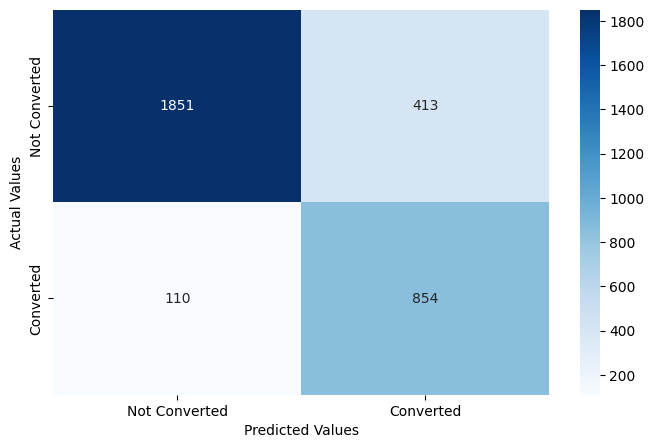

In [ ]:
# Checking tuned model performance on the train data
y_pred_train = rf_tuned.predict(X_train)

metrics_score(y_train, y_pred_train)

Observations:
*   The  tuned random forest models recall score for converted leads is 0.89 on the train data. This is the same as the performance of the tuned decision tree model, with similar precision and accuracy scores as well. The result indicates that the model is performing well on the training data and is not overfitting as much as the original random forest model.


              precision    recall  f1-score   support

           0       0.93      0.81      0.86       971
           1       0.65      0.85      0.74       413

    accuracy                           0.82      1384
   macro avg       0.79      0.83      0.80      1384
weighted avg       0.84      0.82      0.82      1384



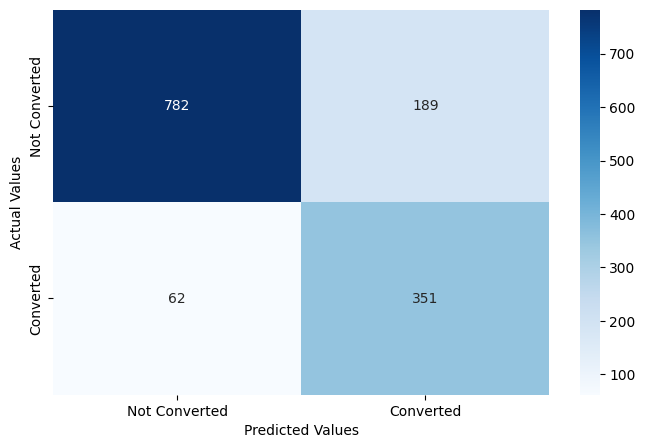

In [ ]:
# Checking tuned model performance on the test data
y_pred_test = rf_tuned.predict(X_test)

metrics_score(y_test, y_pred_test)

Observations:
*   The tuned random forest performance on the test data is very close in similarity to the performance on the train data, indicating the model is not overfitting and it can generalize well to new, unseen data. It has achieved a high recall score of 0.85 for the converted leads, meaning it correctly identifies 85% of the leads in the test data that actually convert.
*   The tuned random forest model and tuned decision tree model have near identical performances on the test data. Both have a recall score of 0.85, which is the primary metric of interest. The decision tree performs slightly better on precision and accuracy.
*   Given the same recall score and very similar results on the other metrics, either could be a good choice. However, the tuned decision tree has slightly better overall performance and it is visually more interpretible than random forest. The plot tree flowchart can show exactly how the decision tree model makes its decisions, this isn't possible with the random subsets of data and features of many decision trees aggregated together in the ensemble that is the random forest model.






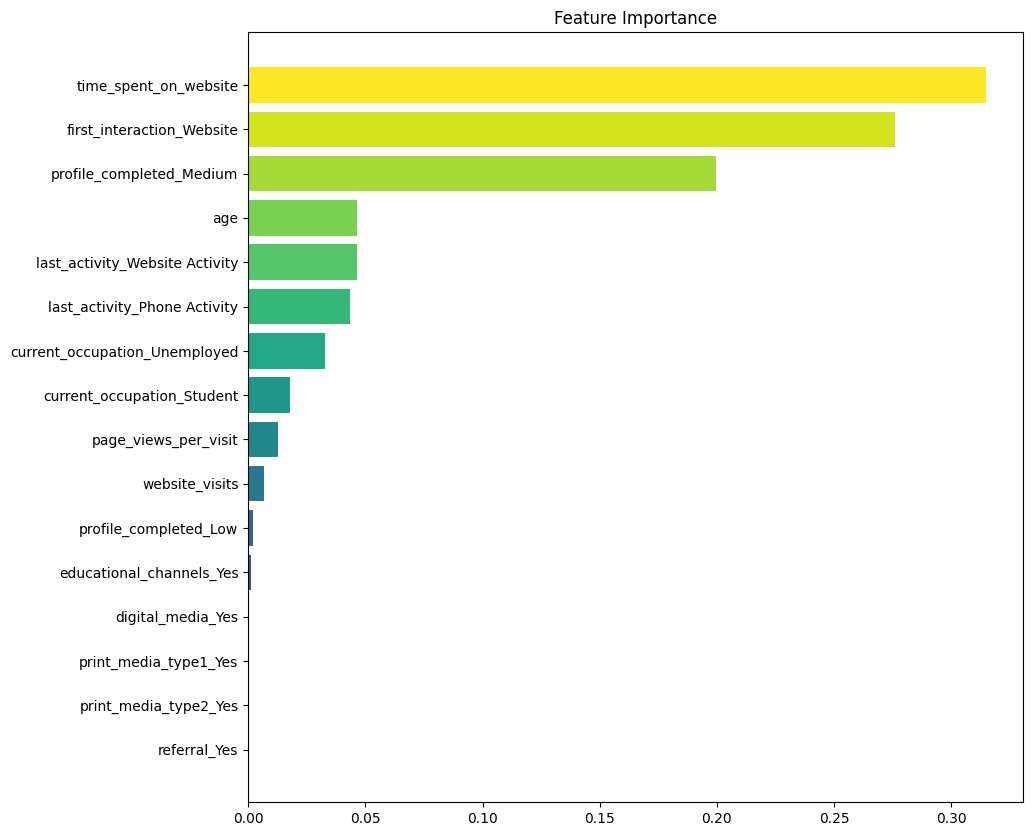

In [ ]:
# Checking tuned model feature importance

importances = rf_tuned.feature_importances_
columns = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)

# Rearrange feature names so they match the sorted feature importances
columns = columns[indices]

# Create plot
plt.figure(figsize = (10, 10))

# Create plot title
plt.title("Feature Importance")

# Add bars with different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(importances)))
plt.barh(range(X.shape[1]), importances[indices], color=colors)

# Add feature names as y-axis labels
plt.yticks(range(X.shape[1]), columns)

# Show plot
plt.show()

Observations:
*   The feature importance plot for the tuned random forest model shows consistency with the findings from the EDA and the decision tree models. All three models identified the same top three most influential features being 'time_spent_on_website', 'first_interaction_Website', and 'profile_completed_Medium'.
*   'time_spent_on_website' remains the most important feature, which shows that the level of engagement a lead has with the website is the most powerful predictor of whether they will convert.
*   'first_interaction_Website' was mutually ranked as the second most important feature, which confirms that the channel for first interaction is a key moment and the website is a more effective channel for conversion than the mobile app.
*   'profile_completed_Medium' was mutually ranked third most important feature. This in relation with the low ranking of 'profile_completed_Low', reinforces the idea that the more information a lead provides, the stronger their level of interest and intent to convert.
*   The tuned random forest model does give slightly higher importance to 'age' compared to the decision tree models. This could be due to the random forest being an ensemble of many trees, better able to capture more complex, non-linear relationships between 'age' and other variables.








## Actionable Insights and Recommendations

*   We have been able to successfully build and tune tree-based models that can predict whether a lead is likely to convert to a paid customer with a high degree of accuracy. Both the tuned random forest and tuned decision tree models had similar performances on the train and test data, indicating the model is generalizing well to new, unseen data and doesn't have an overfitting problem. Recall is the primary metric of interest and both models have a high recall score of 85% on the test data, which means 85% of converted leads were correctly identified. Either model could be a good choice for ExtraaLearn to use for their business. However, the tuned decision tree model did have  slightly better precision and accurracy, and the decision tree model is much more intepretable in tracking its predictive decision making compared to the complex ensemble nature of the random forest model. The random forest model would be better able to capture more complex, non-linear relationships between the
features.

*   The conclusions of our analysis can be given a high degree of confidence, because all three of the built and tested predictive machine learning tree-based models converged on identifying the most important factors that were key drivers of lead conversion to paid customers. This consistency validates the findings that the relationship between the most important features and conversion are a robust and genuine pattern in the data.
  1.   Time spent on the website was the most important factor, which is the more time a lead spends on the website, the more likely they are to convert.
  2.   First interaction channel being the website was the second most important factor, with leads having the website as their first point of contact being significantly more likely to convert than those who first interaction was via the mobile app.
  3.   Profile completion was ranked as the third most important factor with it being a strong indicator of the likelihood of a lead to convert. Higher levels of profile completion associated with more information provided by the lead, signalled a greater likelihood of conversion.
  4.   Other notable features that signalled a higher likelihood of conversion were the leads current occupation being a professional and the age of the lead being older.


*   Based on our analysis, the profile of an ideal lead who is likely to convert and whom ExtraaLearn should prioritize:
  1.   A professional that is looking to upskill or reskill, whether that is for a promotion to make more money or looking to change careers.
  2.   Their first interaction was through the website, not the mobile app.
  3.   They spent a significant amount of time on the website, browsing different pages and engaged in learning about the programs.
  4.   They have a high level of profile completion, indicating a strong interest in the services ExtraaLearn has to offer them.
  5.   They are most likely middle-aged.

*   Based on the findings, it is recommended that Extraalearn takes the following actions:
  1.   The fact that the longer time spent on the website the more likely a lead is to convert, highlights the need for engaging website content as a critical part of the conversion process. The primary goal should be to increase the amount of time that leads spend on the website, because the website is the most effective channel for acquiring leads likely to convert. This could be because the website provides a more comprehensive and persuasive experience that allows leads to gather more information and build trust in what Extraalearn offers. It is essential that the website experience is optimized to be  as engaging as possible, which can involve allocating resources to create high-quality engaging content, improving user experience, and making it easier for leads to find the information they are looking for.
  2.   More resources should be invested in driving traffic to the website, which is where Extraalearn will be able to find and prioritize the best leads. This can involve more content marketing or paid advertising campaigns that direct users to the website. The mobile app could be redesigned to closer resemble the website content or can be utilized in guiding leads whom first interacted with the mobile app to the website where they are significantly more likely to convert.
  3.   Extraalearn should encourage leads to complete their profiles by offering incentives such as access to exclusive content, free consultations, or discounts.
  4. Driving website usage and encouraging profile completion can allow Extraalearn to focus more on prioritizing likely converts, whom are the leads that spend a lot of time on the website and have a high level of profile completion.



